In [1]:
import pandas as pd
import numpy as np  
import os
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

c:\Users\paulo\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Get the current directory
current_dir = os.getcwd()

# Navigate one folder up
parent_dir = os.path.dirname(current_dir)

# Where the files are located
data = "data/other/From2021_to_Jan2025_PricesHotelsDates"

# Navigate down into the "data" folder
data_dir = os.path.join(parent_dir, data)

# Initialize an empty list to store DataFrames
dataframes = []

# Variable to track total rows
total_rows = 0

# Loop through all files in the "data" folder
try:
    for file_name in os.listdir(data_dir):
        
        if file_name.endswith('.csv'):  # Check if the file is a CSV
            
            file_path = os.path.join(data_dir, file_name)
            
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            dataframes.append(df)  # Append the DataFrame to the list
            
             # Print dimensions of the current file
            print(f"File: {file_name} | Dimensions: {df.shape}")
            
            # Add the number of rows to the total count
            total_rows += df.shape[0]

    # Concatenate all DataFrames in the list by binding rows
    combined_df = pd.concat(dataframes, ignore_index=True)

    # Print dimensions of the combined DataFrame
    print(f"Combined DataFrame Dimensions: {combined_df.shape}")

    # Verify the sum of rows matches
    if total_rows == combined_df.shape[0]:
        print("Row count verification successful! Total rows match.")
    else:
        print("Row count verification failed! Mismatch in row count.")

    print(combined_df.head())  # Display the first few rows of the combined DataFrame

except FileNotFoundError:
    print(f"Folder '{data_dir}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

File: data-lake-prd-314410.cz.pull-pesquisas_From2021_to_Jan2025_PricesHotelsDates_p1.csv | Dimensions: (1237203, 4)
File: data-lake-prd-314410.cz.pull-pesquisas_From2021_to_Jan2025_PricesHotelsDates_p2.csv | Dimensions: (13561242, 4)
File: data-lake-prd-314410.cz.pull-pesquisas_From2021_to_Jan2025_PricesHotelsDates_p3.csv | Dimensions: (11945730, 4)
File: data-lake-prd-314410.cz.pull-pesquisas_From2021_to_Jan2025_PricesHotelsDates_p4.csv | Dimensions: (13561242, 4)
File: data-lake-prd-314410.cz.pull-pesquisas_From2021_to_Jan2025_PricesHotelsDates_p5.csv | Dimensions: (16370071, 4)
Combined DataFrame Dimensions: (56675488, 4)
Row count verification successful! Total rows match.
   Hotel_ID                     Data  DiariaMedia  Reservas
0     12469  2021-11-09 00:00:00 UTC   559.136666         1
1     11362  2021-11-10 00:00:00 UTC   220.000000         2
2     12277  2021-11-10 00:00:00 UTC   351.937500         1
3      4244  2021-10-24 00:00:00 UTC   534.472000         1
4      7408  

In [3]:
combined_df.shape

(56675488, 4)

In [4]:
del current_dir, data, data_dir, dataframes, df, file_name, file_path, parent_dir, total_rows

In [5]:
data_lake_prd_314410_cz_moedas = pd.read_csv('..\\data\\lookups\\data-lake-prd-314410.cz.moedas.csv')
data_lake_prd_314410_cz_moedas.head

<bound method NDFrame.head of     Moeda_ID               Descricao_Moeda Moeda Simbolo  Ordem  Cotacao_BRL  \
0          6          Azerbaijan New Manat   AZN       $      6          NaN   
1          9                 Belarus Ruble   BYR       p      9          NaN   
2         13  Bosnia and Herzegovina Marka   BAM      KM     13          NaN   
3         16                   Brazil Real   BRL      R$   -100       1.0000   
4        119     Venezuelan Bolívar Fuerte   VEF     VEF    119          NaN   
..       ...                           ...   ...     ...    ...          ...   
59         5              Australia Dollar   AUD       $      5       3.7582   
60        14                 Botswana Pula   BWP       P     14       0.4289   
61        34                          Euro   EUR       €    -98       6.2442   
62       108                      UK Pound   GBP       £    108       7.3999   
63        72            New Zealand Dollar   NZD       $     72       3.3997   

    Cotac

In [6]:
data_lake_prd_314410_cz_hoteis = pd.read_csv('..\\data\\lookups\\data-lake-prd-314410.cz.hoteis.csv')
data_lake_prd_314410_cz_hoteis.head

<bound method NDFrame.head of        Hotel_ID  Rede_ID                                  Hotel  Estrelas  \
0          3728        7           Gran Bourbon Hotel  Asunción       5.0   
1          3765      217    Tamarijn Aruba All Inclusive Resort       3.0   
2          4876      186           Dreams Las Mareas Costa Rica       5.0   
3          5113      217  Divi Aruba Beach Resort All Inclusive       4.0   
4          5114      217        Divi Dutch Village Beach Resort       4.0   
...         ...      ...                                    ...       ...   
19645     20835      555              VOA Pousada Divino Oleiro       3.0   
19646     20606        0                          Hotel Janaina       4.0   
19647     20764        0               Hotel Vivenda dos Sonhos       3.0   
19648     20366       79                     Double Tree Canela       3.0   
19649     20822        0               O Canto do Vale Trancoso       3.0   

                                             

In [7]:
data_lake_prd_314410_cz_hoteis.columns

Index(['Hotel_ID', 'Rede_ID', 'Hotel', 'Estrelas', 'Endereco', 'Bairro', 'CEP',
       'Quartos', 'CategoriaHotel', 'Moeda', 'StatusHotel', 'Cidade_ID'],
      dtype='object')

In [8]:
data_lake_prd_314410_cz_hoteis = data_lake_prd_314410_cz_hoteis[['Hotel_ID', 'Moeda', 'Cidade_ID']]

In [9]:
data_lake_prd_314410_cz_hoteis = pd.merge(data_lake_prd_314410_cz_hoteis, 
                     data_lake_prd_314410_cz_moedas[['Moeda', 'Cotacao_USD']], 
                     on='Moeda', 
                     how='left')

In [10]:
data_lake_prd_314410_cz_hoteis = data_lake_prd_314410_cz_hoteis.dropna()

In [11]:
data_lake_prd_314410_cz_hoteis # if wanting to convert it all to dollars

Hotel_ID Moeda  Cidade_ID  Cotacao_USD
0          3728   USD  8009868.0      1.00000
1          3765   USD  8010716.0      1.00000
2          4876   USD   251869.0      1.00000
3          5113   USD  8010716.0      1.00000
4          5114   USD  8010716.0      1.00000
...         ...   ...        ...          ...
19645     20835   BRL  6044433.0      0.16484
19646     20606   BRL  1531473.0      0.16484
19647     20764   BRL  4464157.0      0.16484
19648     20366   BRL  3146178.0      0.16484
19649     20822   BRL  8010651.0      0.16484

[19549 rows x 4 columns]

In [12]:
combined_df

Hotel_ID                     Data  DiariaMedia  Reservas
0            12469  2021-11-09 00:00:00 UTC   559.136666         1
1            11362  2021-11-10 00:00:00 UTC   220.000000         2
2            12277  2021-11-10 00:00:00 UTC   351.937500         1
3             4244  2021-10-24 00:00:00 UTC   534.472000         1
4             7408  2021-11-09 00:00:00 UTC   170.000000         1
...            ...                      ...          ...       ...
56675483      5850  2024-11-08 00:00:00 UTC   231.703333         3
56675484      5911  2024-06-11 00:00:00 UTC   214.425000         3
56675485      4699  2024-03-01 00:00:00 UTC   282.875000         3
56675486     15265  2024-07-24 00:00:00 UTC   855.880000         3
56675487      2652  2024-07-18 00:00:00 UTC   406.163333         3

[56675488 rows x 4 columns]

In [13]:
# Perform a left join on 'Hotel_ID'
combined_df = pd.merge(combined_df, data_lake_prd_314410_cz_hoteis, on='Hotel_ID', how='left')

In [14]:
combined_df

Hotel_ID                     Data  DiariaMedia  Reservas Moeda  \
0            12469  2021-11-09 00:00:00 UTC   559.136666         1   BRL   
1            11362  2021-11-10 00:00:00 UTC   220.000000         2   BRL   
2            12277  2021-11-10 00:00:00 UTC   351.937500         1   BRL   
3             4244  2021-10-24 00:00:00 UTC   534.472000         1   BRL   
4             7408  2021-11-09 00:00:00 UTC   170.000000         1   USD   
...            ...                      ...          ...       ...   ...   
56675483      5850  2024-11-08 00:00:00 UTC   231.703333         3   BRL   
56675484      5911  2024-06-11 00:00:00 UTC   214.425000         3   BRL   
56675485      4699  2024-03-01 00:00:00 UTC   282.875000         3   BRL   
56675486     15265  2024-07-24 00:00:00 UTC   855.880000         3   MXN   
56675487      2652  2024-07-18 00:00:00 UTC   406.163333         3   BRL   

          Cidade_ID  Cotacao_USD  
0         2747572.0     0.164840  
1         6811460.0     0.164840  
2         4464157.0     0.164840  
3         4108172.0     0.164840  
4         8009792.0     1.000000  
...             ...          ...  
56675483  2851556.0     0.164840  
56675484  2661556.0     0.164840  
56675485  3990523.0     0.164840  
56675486  8009855.0     0.048835  
56675487  4068915.0     0.164840  

[56675488 rows x 7 columns]

In [15]:
combined_df.isna().sum()

Hotel_ID          0
Data              0
DiariaMedia     109
Reservas          0
Moeda          2737
Cidade_ID      2737
Cotacao_USD    2737
dtype: int64

In [16]:
combined_df = combined_df.dropna()

In [17]:
combined_df

Hotel_ID                     Data  DiariaMedia  Reservas Moeda  \
0            12469  2021-11-09 00:00:00 UTC   559.136666         1   BRL   
1            11362  2021-11-10 00:00:00 UTC   220.000000         2   BRL   
2            12277  2021-11-10 00:00:00 UTC   351.937500         1   BRL   
3             4244  2021-10-24 00:00:00 UTC   534.472000         1   BRL   
4             7408  2021-11-09 00:00:00 UTC   170.000000         1   USD   
...            ...                      ...          ...       ...   ...   
56675483      5850  2024-11-08 00:00:00 UTC   231.703333         3   BRL   
56675484      5911  2024-06-11 00:00:00 UTC   214.425000         3   BRL   
56675485      4699  2024-03-01 00:00:00 UTC   282.875000         3   BRL   
56675486     15265  2024-07-24 00:00:00 UTC   855.880000         3   MXN   
56675487      2652  2024-07-18 00:00:00 UTC   406.163333         3   BRL   

          Cidade_ID  Cotacao_USD  
0         2747572.0     0.164840  
1         6811460.0     0.164840  
2         4464157.0     0.164840  
3         4108172.0     0.164840  
4         8009792.0     1.000000  
...             ...          ...  
56675483  2851556.0     0.164840  
56675484  2661556.0     0.164840  
56675485  3990523.0     0.164840  
56675486  8009855.0     0.048835  
56675487  4068915.0     0.164840  

[56672642 rows x 7 columns]

In [18]:
# Select distinct "Cidade_ID" and "Moeda"
distinct_cidade_moeda = combined_df[['Cidade_ID', 'Moeda']].drop_duplicates()

# Count distinct "Moeda" for each "Cidade_ID"
cidade_moeda_count = distinct_cidade_moeda.groupby('Cidade_ID').size().reset_index(name='n')

# Sort by the count of distinct "Moeda"
cidade_moeda_count_sorted = cidade_moeda_count.sort_values(by='n', ascending=False)

# Display the result
print(cidade_moeda_count_sorted)

      Cidade_ID  n
1119  7562201.0  3
413   2724357.0  3
749   4970211.0  3
1177  8009351.0  3
117    796504.0  3
...         ... ..
452   2920338.0  1
451   2919265.0  1
450   2912977.0  1
449   2912305.0  1
1335  8010785.0  1

[1336 rows x 2 columns]


In [19]:
cidade_moeda_count_sorted.groupby('n').size().reset_index(name='nn')


n    nn
0  1  1242
1  2    89
2  3     5

In [20]:
cidade_moeda_2plus = cidade_moeda_count_sorted[cidade_moeda_count_sorted['n'] > 1]
print(cidade_moeda_2plus)

      Cidade_ID  n
1119  7562201.0  3
413   2724357.0  3
749   4970211.0  3
1177  8009351.0  3
117    796504.0  3
...         ... ..
1275  8009844.0  2
1018  6808460.0  2
359   2363882.0  2
1274  8009843.0  2
19     107141.0  2

[94 rows x 2 columns]


In [21]:
combined_df

Hotel_ID                     Data  DiariaMedia  Reservas Moeda  \
0            12469  2021-11-09 00:00:00 UTC   559.136666         1   BRL   
1            11362  2021-11-10 00:00:00 UTC   220.000000         2   BRL   
2            12277  2021-11-10 00:00:00 UTC   351.937500         1   BRL   
3             4244  2021-10-24 00:00:00 UTC   534.472000         1   BRL   
4             7408  2021-11-09 00:00:00 UTC   170.000000         1   USD   
...            ...                      ...          ...       ...   ...   
56675483      5850  2024-11-08 00:00:00 UTC   231.703333         3   BRL   
56675484      5911  2024-06-11 00:00:00 UTC   214.425000         3   BRL   
56675485      4699  2024-03-01 00:00:00 UTC   282.875000         3   BRL   
56675486     15265  2024-07-24 00:00:00 UTC   855.880000         3   MXN   
56675487      2652  2024-07-18 00:00:00 UTC   406.163333         3   BRL   

          Cidade_ID  Cotacao_USD  
0         2747572.0     0.164840  
1         6811460.0     0.164840  
2         4464157.0     0.164840  
3         4108172.0     0.164840  
4         8009792.0     1.000000  
...             ...          ...  
56675483  2851556.0     0.164840  
56675484  2661556.0     0.164840  
56675485  3990523.0     0.164840  
56675486  8009855.0     0.048835  
56675487  4068915.0     0.164840  

[56672642 rows x 7 columns]

In [22]:
# Group by 'Cidade_ID' and calculate the mean of 'DiariaMedia'
combined_df.groupby('Cidade_ID')['DiariaMedia'].mean()

Cidade_ID
788.0        31587.591369
1024.0       59103.802156
2677.0         266.385000
3433.0         251.000000
18966.0        905.314672
                 ...     
8010770.0      502.061178
8010773.0     5250.000000
8010776.0      361.981535
8010781.0     5108.125251
8010785.0     2500.000000
Name: DiariaMedia, Length: 1336, dtype: float64

In [23]:
# Calculate the weighted mean of "DiariaMedia" using "Reservas" as the weight
combined_city_df = combined_df.groupby(['Data', 'Moeda', 'Cidade_ID']).apply(
    lambda x: np.average(x['DiariaMedia'], weights=x['Reservas'])
).reset_index(name='Weighted_DiariaMedia')

C:\Users\paulo\AppData\Local\Temp\ipykernel_15284\2972331229.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_city_df = combined_df.groupby(['Data', 'Moeda', 'Cidade_ID']).apply(


In [24]:
# Display the result
combined_city_df.groupby('Cidade_ID')['Weighted_DiariaMedia'].mean()

Cidade_ID
788.0        29338.136689
1024.0       59764.848142
2677.0         266.206439
3433.0         250.285714
18966.0        901.599856
                 ...     
8010770.0      512.944455
8010773.0     5250.000000
8010776.0      360.545863
8010781.0     5102.279589
8010785.0     2500.000000
Name: Weighted_DiariaMedia, Length: 1336, dtype: float64

In [25]:

combined_df[combined_df['Cidade_ID']==7562201.0].groupby(['Cidade_ID', 'Moeda']).apply(
    lambda x: np.average(x['DiariaMedia'])
    )

C:\Users\paulo\AppData\Local\Temp\ipykernel_15284\1227644409.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_df[combined_df['Cidade_ID']==7562201.0].groupby(['Cidade_ID', 'Moeda']).apply(


Cidade_ID  Moeda
7562201.0  COP      999040.672956
           MXN        1815.236186
           USD          39.446979
dtype: float64

In [26]:

combined_city_df[combined_city_df['Cidade_ID']==7562201.0].groupby(['Cidade_ID', 'Moeda']).apply(
    lambda x: np.average(x['Weighted_DiariaMedia'])
    )

C:\Users\paulo\AppData\Local\Temp\ipykernel_15284\3279762856.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_city_df[combined_city_df['Cidade_ID']==7562201.0].groupby(['Cidade_ID', 'Moeda']).apply(


Cidade_ID  Moeda
7562201.0  COP      702973.337249
           MXN        1660.149202
           USD          39.669782
dtype: float64

In [27]:
combined_city_df

Data Moeda  Cidade_ID  Weighted_DiariaMedia
0       2021-04-27 00:00:00 UTC   USD  8009792.0            376.547742
1       2021-06-12 00:00:00 UTC   USD  8009793.0             48.647500
2       2021-07-02 00:00:00 UTC   BRL  6746991.0            274.114285
3       2021-07-05 00:00:00 UTC   BRL  3324752.0           1273.470000
4       2021-07-20 00:00:00 UTC   BRL  2794278.0            900.000000
...                         ...   ...        ...                   ...
754705  2025-01-30 00:00:00 UTC   USD  8010661.0            505.161855
754706  2025-01-30 00:00:00 UTC   USD  8010709.0            357.000000
754707  2025-01-30 00:00:00 UTC   USD  8010716.0            383.491905
754708  2025-01-30 00:00:00 UTC   USD  8010727.0            195.235000
754709  2025-01-30 00:00:00 UTC   USD  8010750.0           1254.303333

[754710 rows x 4 columns]

In [28]:
# sort by 'Cidade_ID' and 'Data'
combined_city_df = combined_city_df.sort_values(by=['Cidade_ID', 'Moeda', 'Data'])

In [29]:
combined_city_df

Data Moeda  Cidade_ID  Weighted_DiariaMedia
2772    2021-11-23 00:00:00 UTC   CLP      788.0          33660.316200
3358    2021-11-24 00:00:00 UTC   CLP      788.0          41671.878150
3945    2021-11-25 00:00:00 UTC   CLP      788.0          40039.275500
4536    2021-11-26 00:00:00 UTC   CLP      788.0          22210.121325
5628    2021-11-28 00:00:00 UTC   CLP      788.0          43494.500000
...                         ...   ...        ...                   ...
751871  2025-01-26 00:00:00 UTC   MZN  8010781.0           4950.000000
752624  2025-01-27 00:00:00 UTC   MZN  8010781.0           4659.677700
753390  2025-01-28 00:00:00 UTC   MZN  8010781.0           4658.948500
753464  2025-01-28 00:00:00 UTC   USD  8010785.0           2500.000000
754235  2025-01-29 00:00:00 UTC   USD  8010785.0           2500.000000

[754710 rows x 4 columns]

In [30]:
combined_city_df['Data'] = pd.to_datetime(combined_city_df['Data']).dt.tz_localize(None)
combined_city_df.head

<bound method NDFrame.head of              Data Moeda  Cidade_ID  Weighted_DiariaMedia
2772   2021-11-23   CLP      788.0          33660.316200
3358   2021-11-24   CLP      788.0          41671.878150
3945   2021-11-25   CLP      788.0          40039.275500
4536   2021-11-26   CLP      788.0          22210.121325
5628   2021-11-28   CLP      788.0          43494.500000
...           ...   ...        ...                   ...
751871 2025-01-26   MZN  8010781.0           4950.000000
752624 2025-01-27   MZN  8010781.0           4659.677700
753390 2025-01-28   MZN  8010781.0           4658.948500
753464 2025-01-28   USD  8010785.0           2500.000000
754235 2025-01-29   USD  8010785.0           2500.000000

[754710 rows x 4 columns]>

In [31]:
# Filter for data in 2024
cities_2024 = combined_city_df[combined_city_df['Data'].dt.year == 2024]['Cidade_ID'].unique()

# Filter the original combined_df to keep only cities that appeared in 2024
combined_city_df = combined_city_df[combined_city_df['Cidade_ID'].isin(cities_2024)]

# Display the filtered DataFrame
combined_city_df

Data Moeda  Cidade_ID  Weighted_DiariaMedia
2772   2021-11-23   CLP      788.0          33660.316200
3358   2021-11-24   CLP      788.0          41671.878150
3945   2021-11-25   CLP      788.0          40039.275500
4536   2021-11-26   CLP      788.0          22210.121325
5628   2021-11-28   CLP      788.0          43494.500000
...           ...   ...        ...                   ...
749744 2025-01-23   MZN  8010781.0           4659.677661
751199 2025-01-25   MZN  8010781.0           4659.038566
751871 2025-01-26   MZN  8010781.0           4950.000000
752624 2025-01-27   MZN  8010781.0           4659.677700
753390 2025-01-28   MZN  8010781.0           4658.948500

[747807 rows x 4 columns]

In [32]:
combined_city_df.shape

(747807, 4)

In [33]:
combined_city_df = combined_city_df.loc[:, ['Data',  'Cidade_ID', 'Moeda', 'Weighted_DiariaMedia']]

combined_city_df.rename(columns={'Data': 'ds', 'Cidade_ID': 'city_id', 'Weighted_DiariaMedia': 'y', 'Moeda':'currency'}, inplace=True)

combined_city_df = combined_city_df.loc[:, ['city_id',  'ds', 'y', 'currency']]

In [34]:
combined_city_df = combined_city_df.groupby(['city_id', 'ds', 'currency']).agg({'y': 'mean'}).reset_index()
combined_city_df.shape

(747807, 4)

In [35]:
combined_city_df

city_id         ds currency             y
0           788.0 2021-11-22      USD     50.149183
1           788.0 2021-11-23      CLP  33660.316200
2           788.0 2021-11-24      CLP  41671.878150
3           788.0 2021-11-25      CLP  40039.275500
4           788.0 2021-11-25      USD     39.846100
...           ...        ...      ...           ...
747802  8010781.0 2025-01-23      MZN   4659.677661
747803  8010781.0 2025-01-25      MZN   4659.038566
747804  8010781.0 2025-01-26      MZN   4950.000000
747805  8010781.0 2025-01-27      MZN   4659.677700
747806  8010781.0 2025-01-28      MZN   4658.948500

[747807 rows x 4 columns]

In [36]:
print(combined_city_df['ds'].min())
print(combined_city_df['ds'].max())

2021-04-27 00:00:00
2025-01-30 00:00:00


In [37]:
combined_city_df['city_currency'] = combined_city_df['city_id'].astype(int).astype(str) + '__' + combined_city_df['currency']

In [38]:
combined_city_df

city_id         ds currency             y city_currency
0           788.0 2021-11-22      USD     50.149183      788__USD
1           788.0 2021-11-23      CLP  33660.316200      788__CLP
2           788.0 2021-11-24      CLP  41671.878150      788__CLP
3           788.0 2021-11-25      CLP  40039.275500      788__CLP
4           788.0 2021-11-25      USD     39.846100      788__USD
...           ...        ...      ...           ...           ...
747802  8010781.0 2025-01-23      MZN   4659.677661  8010781__MZN
747803  8010781.0 2025-01-25      MZN   4659.038566  8010781__MZN
747804  8010781.0 2025-01-26      MZN   4950.000000  8010781__MZN
747805  8010781.0 2025-01-27      MZN   4659.677700  8010781__MZN
747806  8010781.0 2025-01-28      MZN   4658.948500  8010781__MZN

[747807 rows x 5 columns]

In [45]:
combined_city_df['city_currency'].unique().shape

(1228,)

In [46]:
# Group by 'city_currency' and count the number of rows for each city currency
city_currencies_counts = combined_city_df.groupby('city_currency').size()

# Filter for city currencies that have more than 183 rows/dates
city_currencies_with_more_than_183_rows = city_currencies_counts[city_currencies_counts > 183].index

# Filter the original table for these hotels
filtered_combined_city_df = combined_city_df[combined_city_df['city_currency'].isin(city_currencies_with_more_than_183_rows)]

# Display the filtered DataFrame
filtered_combined_city_df

city_id         ds currency             y city_currency
0           788.0 2021-11-22      USD     50.149183      788__USD
1           788.0 2021-11-23      CLP  33660.316200      788__CLP
2           788.0 2021-11-24      CLP  41671.878150      788__CLP
3           788.0 2021-11-25      CLP  40039.275500      788__CLP
4           788.0 2021-11-25      USD     39.846100      788__USD
...           ...        ...      ...           ...           ...
747738  8010776.0 2025-01-25      BRL    402.925000  8010776__BRL
747739  8010776.0 2025-01-26      BRL    410.625000  8010776__BRL
747740  8010776.0 2025-01-27      BRL    432.200000  8010776__BRL
747741  8010776.0 2025-01-28      BRL    375.125000  8010776__BRL
747742  8010776.0 2025-01-29      BRL    383.800000  8010776__BRL

[725340 rows x 5 columns]

In [47]:
print(combined_city_df.shape)
print(filtered_combined_city_df.shape)

(747807, 5)
(725340, 5)


In [48]:
city_currency_list = filtered_combined_city_df['city_currency'].drop_duplicates()
print(city_currency_list.shape)

(818,)


In [49]:
city_currency_list = city_currency_list.tolist()

In [50]:
city_currency_list

['788__USD',
 '788__CLP',
 '1024__CLP',
 '18966__BRL',
 '21523__BRL',
 '22526__BRL',
 '25788__BRL',
 '33168__BRL',
 '54154__BRL',
 '95165__BRL',
 '107141__BRL',
 '107141__USD',
 '147244__BRL',
 '151597__BRL',
 '172303__USD',
 '172303__PEN',
 '177485__BRL',
 '189882__BRL',
 '208151__BRL',
 '238327__BRL',
 '251869__USD',
 '262796__BRL',
 '271177__BRL',
 '292664__BRL',
 '303560__BRL',
 '319229__CLP',
 '323444__BRL',
 '340573__BRL',
 '349871__BRL',
 '349993__BRL',
 '354698__BRL',
 '361465__BRL',
 '370310__BRL',
 '380882__BRL',
 '399213__BRL',
 '403596__BRL',
 '405260__BRL',
 '419883__BRL',
 '430562__COP',
 '431722__BRL',
 '438396__BRL',
 '439877__BRL',
 '447596__BRL',
 '471630__BRL',
 '473567__BRL',
 '474324__BRL',
 '486128__BRL',
 '492546__BRL',
 '494140__BRL',
 '497358__BRL',
 '508635__BRL',
 '509072__EUR',
 '519674__BRL',
 '524276__CLP',
 '524445__BRL',
 '530117__BRL',
 '532266__BRL',
 '544005__BRL',
 '548460__BRL',
 '561125__BRL',
 '561206__BRL',
 '561440__BRL',
 '597193__BRL',
 '60063

In [51]:
# Process all hotels without chunking
all_forecasts = pd.DataFrame()

for city_currency in city_currency_list:
    print(f"Processing forecast for City/Currency {city_currency}...")
    
    # Load data for the specific hotel
    city_currency_data = filtered_combined_city_df[filtered_combined_city_df['city_currency'] == city_currency]
    
    # Fit the model
    model = Prophet()
    model.fit(city_currency_data)
    
    # Create future dataframe for predictions
    future = model.make_future_dataframe(periods=365)  # Forecast 1 year ahead
    
    # Make predictions
    forecast = model.predict(future)
    
    # Add hotel name for identification
    forecast["city_currency"] = city_currency
    
    # Mark historical vs. forecasted data
    forecast["data_type"] = ["historical" if date <= city_currency_data["ds"].max() else "forecast" for date in forecast["ds"]]
    
    # Append to the main DataFrame
    all_forecasts = pd.concat([all_forecasts, forecast], ignore_index=True)

# Save the results to a CSV file
all_forecasts.to_csv("../out/city_currency_forecasts_From2021_to_Jan2025onwards.csv", index=False)
print("Forecasting complete. Results saved as 'city_currency_forecasts_From2021_to_Jan2025onwards.csv'.")

Processing forecast for City/Currency 788__USD...


19:31:05 - cmdstanpy - INFO - Chain [1] start processing
19:31:06 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 788__CLP...


19:31:07 - cmdstanpy - INFO - Chain [1] start processing
19:31:07 - cmdstanpy - INFO - Chain [1] done processing
19:31:07 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1024__CLP...


19:31:07 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 18966__BRL...


19:31:08 - cmdstanpy - INFO - Chain [1] start processing
19:31:08 - cmdstanpy - INFO - Chain [1] done processing
19:31:08 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 21523__BRL...


19:31:09 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 22526__BRL...


19:31:09 - cmdstanpy - INFO - Chain [1] start processing
19:31:09 - cmdstanpy - INFO - Chain [1] done processing
19:31:10 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 25788__BRL...


19:31:10 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 33168__BRL...


19:31:11 - cmdstanpy - INFO - Chain [1] start processing
19:31:11 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 54154__BRL...


19:31:12 - cmdstanpy - INFO - Chain [1] start processing
19:31:12 - cmdstanpy - INFO - Chain [1] done processing
19:31:12 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 95165__BRL...


19:31:13 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 107141__BRL...


19:31:13 - cmdstanpy - INFO - Chain [1] start processing
19:31:14 - cmdstanpy - INFO - Chain [1] done processing
19:31:14 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 107141__USD...


19:31:14 - cmdstanpy - INFO - Chain [1] done processing
19:31:15 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 147244__BRL...


19:31:15 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 151597__BRL...


19:31:15 - cmdstanpy - INFO - Chain [1] start processing
19:31:16 - cmdstanpy - INFO - Chain [1] done processing
19:31:16 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 172303__USD...


19:31:16 - cmdstanpy - INFO - Chain [1] done processing
19:31:17 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 172303__PEN...


19:31:17 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 177485__BRL...


19:31:17 - cmdstanpy - INFO - Chain [1] start processing
19:31:18 - cmdstanpy - INFO - Chain [1] done processing
19:31:18 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 189882__BRL...


19:31:18 - cmdstanpy - INFO - Chain [1] done processing
19:31:19 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 208151__BRL...


19:31:19 - cmdstanpy - INFO - Chain [1] done processing
19:31:20 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 238327__BRL...


19:31:20 - cmdstanpy - INFO - Chain [1] done processing
19:31:20 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 251869__USD...


19:31:21 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 262796__BRL...


19:31:21 - cmdstanpy - INFO - Chain [1] start processing
19:31:21 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 271177__BRL...


19:31:22 - cmdstanpy - INFO - Chain [1] start processing
19:31:22 - cmdstanpy - INFO - Chain [1] done processing
19:31:23 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 292664__BRL...


19:31:23 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 303560__BRL...


19:31:23 - cmdstanpy - INFO - Chain [1] start processing
19:31:23 - cmdstanpy - INFO - Chain [1] done processing
19:31:24 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 319229__CLP...


19:31:24 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 323444__BRL...


19:31:25 - cmdstanpy - INFO - Chain [1] start processing
19:31:25 - cmdstanpy - INFO - Chain [1] done processing
19:31:25 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 340573__BRL...


19:31:25 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 349871__BRL...


19:31:26 - cmdstanpy - INFO - Chain [1] start processing
19:31:26 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 349993__BRL...


19:31:27 - cmdstanpy - INFO - Chain [1] start processing
19:31:27 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 354698__BRL...


19:31:28 - cmdstanpy - INFO - Chain [1] start processing
19:31:28 - cmdstanpy - INFO - Chain [1] done processing
19:31:28 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 361465__BRL...


19:31:29 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 370310__BRL...


19:31:29 - cmdstanpy - INFO - Chain [1] start processing
19:31:29 - cmdstanpy - INFO - Chain [1] done processing
19:31:30 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 380882__BRL...


19:31:30 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 399213__BRL...


19:31:31 - cmdstanpy - INFO - Chain [1] start processing
19:31:31 - cmdstanpy - INFO - Chain [1] done processing
19:31:31 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 403596__BRL...


19:31:31 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 405260__BRL...


19:31:32 - cmdstanpy - INFO - Chain [1] start processing
19:31:32 - cmdstanpy - INFO - Chain [1] done processing
19:31:33 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 419883__BRL...


19:31:33 - cmdstanpy - INFO - Chain [1] done processing
19:31:33 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 430562__COP...


19:31:33 - cmdstanpy - INFO - Chain [1] done processing
19:31:34 - cmdstanpy - INFO - Chain [1] start processing
19:31:34 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 431722__BRL...


19:31:34 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 438396__BRL...


19:31:34 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 439877__BRL...


19:31:35 - cmdstanpy - INFO - Chain [1] start processing
19:31:35 - cmdstanpy - INFO - Chain [1] done processing
19:31:36 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 447596__BRL...


19:31:36 - cmdstanpy - INFO - Chain [1] done processing
19:31:37 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 471630__BRL...


19:31:37 - cmdstanpy - INFO - Chain [1] done processing
19:31:37 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 473567__BRL...


19:31:37 - cmdstanpy - INFO - Chain [1] done processing
19:31:38 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 474324__BRL...


19:31:38 - cmdstanpy - INFO - Chain [1] done processing
19:31:39 - cmdstanpy - INFO - Chain [1] start processing
19:31:39 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 486128__BRL...
Processing forecast for City/Currency 492546__BRL...


19:31:39 - cmdstanpy - INFO - Chain [1] start processing
19:31:40 - cmdstanpy - INFO - Chain [1] done processing
19:31:40 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 494140__BRL...


19:31:40 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 497358__BRL...


19:31:41 - cmdstanpy - INFO - Chain [1] start processing
19:31:41 - cmdstanpy - INFO - Chain [1] done processing
19:31:42 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 508635__BRL...


19:31:42 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 509072__EUR...


19:31:42 - cmdstanpy - INFO - Chain [1] start processing
19:31:42 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 519674__BRL...


19:31:43 - cmdstanpy - INFO - Chain [1] start processing
19:31:43 - cmdstanpy - INFO - Chain [1] done processing
19:31:44 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 524276__CLP...


19:31:44 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 524445__BRL...


19:31:45 - cmdstanpy - INFO - Chain [1] start processing
19:31:45 - cmdstanpy - INFO - Chain [1] done processing
19:31:45 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 530117__BRL...


19:31:45 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 532266__BRL...


19:31:46 - cmdstanpy - INFO - Chain [1] start processing
19:31:46 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 544005__BRL...


19:31:47 - cmdstanpy - INFO - Chain [1] start processing
19:31:47 - cmdstanpy - INFO - Chain [1] done processing
19:31:48 - cmdstanpy - INFO - Chain [1] start processing
19:31:48 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 548460__BRL...


19:31:48 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 561125__BRL...


19:31:48 - cmdstanpy - INFO - Chain [1] done processing
19:31:49 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 561206__BRL...


19:31:49 - cmdstanpy - INFO - Chain [1] done processing
19:31:50 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 561440__BRL...


19:31:50 - cmdstanpy - INFO - Chain [1] done processing
19:31:50 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 597193__BRL...


19:31:50 - cmdstanpy - INFO - Chain [1] done processing
19:31:51 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 600631__BRL...


19:31:51 - cmdstanpy - INFO - Chain [1] done processing
19:31:52 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 630553__BRL...


19:31:52 - cmdstanpy - INFO - Chain [1] done processing
19:31:53 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 664869__BRL...


19:31:53 - cmdstanpy - INFO - Chain [1] done processing
19:31:54 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 666006__BRL...


19:31:54 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 675503__BRL...


19:31:54 - cmdstanpy - INFO - Chain [1] start processing
19:31:54 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 675716__BRL...


19:31:55 - cmdstanpy - INFO - Chain [1] start processing
19:31:56 - cmdstanpy - INFO - Chain [1] done processing
19:31:56 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 678473__EUR...


19:31:56 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 689379__BRL...


19:31:57 - cmdstanpy - INFO - Chain [1] start processing
19:31:57 - cmdstanpy - INFO - Chain [1] done processing
19:31:58 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 692863__BRL...


19:31:58 - cmdstanpy - INFO - Chain [1] done processing
19:31:58 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 710013__BRL...


19:31:59 - cmdstanpy - INFO - Chain [1] done processing
19:31:59 - cmdstanpy - INFO - Chain [1] start processing
19:31:59 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 723285__COP...


19:32:00 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 731228__BRL...


19:32:00 - cmdstanpy - INFO - Chain [1] done processing
19:32:00 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 771219__EUR...


19:32:01 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 779784__USD...


19:32:01 - cmdstanpy - INFO - Chain [1] start processing
19:32:01 - cmdstanpy - INFO - Chain [1] done processing
19:32:02 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 791350__BRL...


19:32:02 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 796504__COP...


19:32:03 - cmdstanpy - INFO - Chain [1] start processing
19:32:03 - cmdstanpy - INFO - Chain [1] done processing
19:32:03 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 796504__USD...


19:32:04 - cmdstanpy - INFO - Chain [1] done processing
19:32:04 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 798885__BRL...


19:32:04 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 808524__EUR...


19:32:05 - cmdstanpy - INFO - Chain [1] start processing
19:32:05 - cmdstanpy - INFO - Chain [1] done processing
19:32:06 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 822483__BRL...


19:32:06 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 823033__BRL...


19:32:06 - cmdstanpy - INFO - Chain [1] start processing
19:32:07 - cmdstanpy - INFO - Chain [1] done processing
19:32:07 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 835249__BRL...


19:32:07 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 850367__BRL...


19:32:08 - cmdstanpy - INFO - Chain [1] start processing
19:32:08 - cmdstanpy - INFO - Chain [1] done processing
19:32:09 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 864280__USD...


19:32:09 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 919548__BRL...


19:32:09 - cmdstanpy - INFO - Chain [1] start processing
19:32:09 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 921766__BRL...


19:32:10 - cmdstanpy - INFO - Chain [1] start processing
19:32:10 - cmdstanpy - INFO - Chain [1] done processing
19:32:10 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 921834__BRL...


19:32:10 - cmdstanpy - INFO - Chain [1] done processing
19:32:11 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 932998__BRL...


19:32:11 - cmdstanpy - INFO - Chain [1] done processing
19:32:12 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 945146__BRL...


19:32:12 - cmdstanpy - INFO - Chain [1] done processing
19:32:13 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 981486__BRL...


19:32:13 - cmdstanpy - INFO - Chain [1] done processing
19:32:13 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 987849__USD...


19:32:14 - cmdstanpy - INFO - Chain [1] done processing
19:32:14 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 988044__COP...


19:32:14 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1005094__BRL...


19:32:15 - cmdstanpy - INFO - Chain [1] start processing
19:32:15 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1042254__BRL...


19:32:15 - cmdstanpy - INFO - Chain [1] start processing
19:32:15 - cmdstanpy - INFO - Chain [1] done processing
19:32:16 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1056447__BRL...


19:32:16 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1079741__BRL...


19:32:17 - cmdstanpy - INFO - Chain [1] start processing
19:32:17 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1086741__BRL...


19:32:17 - cmdstanpy - INFO - Chain [1] start processing
19:32:18 - cmdstanpy - INFO - Chain [1] done processing
19:32:18 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1109342__BRL...


19:32:18 - cmdstanpy - INFO - Chain [1] done processing
19:32:19 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1123449__BRL...


19:32:19 - cmdstanpy - INFO - Chain [1] done processing
19:32:20 - cmdstanpy - INFO - Chain [1] start processing
19:32:20 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1155739__COP...


19:32:20 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1167007__BRL...


19:32:20 - cmdstanpy - INFO - Chain [1] done processing
19:32:21 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1177380__BRL...


19:32:21 - cmdstanpy - INFO - Chain [1] done processing
19:32:21 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1178778__BRL...


19:32:22 - cmdstanpy - INFO - Chain [1] done processing
19:32:22 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1217928__BRL...


19:32:22 - cmdstanpy - INFO - Chain [1] done processing
19:32:23 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1239064__BRL...


19:32:23 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1262508__BRL...


19:32:23 - cmdstanpy - INFO - Chain [1] start processing
19:32:23 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1266391__BRL...


19:32:24 - cmdstanpy - INFO - Chain [1] start processing
19:32:24 - cmdstanpy - INFO - Chain [1] done processing
19:32:25 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1284209__BRL...


19:32:25 - cmdstanpy - INFO - Chain [1] done processing
19:32:25 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1291343__MXN...


19:32:25 - cmdstanpy - INFO - Chain [1] done processing
19:32:26 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1291343__USD...


19:32:26 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1300769__BRL...


19:32:26 - cmdstanpy - INFO - Chain [1] start processing
19:32:27 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1304201__BRL...


19:32:27 - cmdstanpy - INFO - Chain [1] start processing
19:32:27 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1311980__BRL...


19:32:28 - cmdstanpy - INFO - Chain [1] start processing
19:32:28 - cmdstanpy - INFO - Chain [1] done processing
19:32:29 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1312528__BRL...


19:32:29 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1324177__BRL...


19:32:29 - cmdstanpy - INFO - Chain [1] start processing
19:32:30 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1362234__BRL...


19:32:30 - cmdstanpy - INFO - Chain [1] start processing
19:32:30 - cmdstanpy - INFO - Chain [1] done processing
19:32:31 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1381264__COP...


19:32:31 - cmdstanpy - INFO - Chain [1] done processing
19:32:32 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1381264__USD...


19:32:32 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1385055__BRL...


19:32:33 - cmdstanpy - INFO - Chain [1] start processing
19:32:33 - cmdstanpy - INFO - Chain [1] done processing
19:32:33 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1403066__BRL...


19:32:34 - cmdstanpy - INFO - Chain [1] done processing
19:32:34 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1420459__BRL...


19:32:34 - cmdstanpy - INFO - Chain [1] done processing
19:32:35 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1439961__BRL...


19:32:35 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1440081__BRL...


19:32:35 - cmdstanpy - INFO - Chain [1] start processing
19:32:35 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1460291__COP...


19:32:36 - cmdstanpy - INFO - Chain [1] start processing
19:32:36 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1460879__BRL...


19:32:37 - cmdstanpy - INFO - Chain [1] start processing
19:32:37 - cmdstanpy - INFO - Chain [1] done processing
19:32:37 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1486755__BRL...


19:32:38 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1488769__MXN...


19:32:38 - cmdstanpy - INFO - Chain [1] start processing
19:32:39 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1488769__USD...


19:32:39 - cmdstanpy - INFO - Chain [1] start processing
19:32:40 - cmdstanpy - INFO - Chain [1] done processing
19:32:40 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1492404__BRL...


19:32:40 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1494988__BRL...


19:32:41 - cmdstanpy - INFO - Chain [1] start processing
19:32:41 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1519762__BRL...


19:32:42 - cmdstanpy - INFO - Chain [1] start processing
19:32:42 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1520063__BRL...


19:32:43 - cmdstanpy - INFO - Chain [1] start processing
19:32:43 - cmdstanpy - INFO - Chain [1] done processing
19:32:43 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1528508__BRL...


19:32:43 - cmdstanpy - INFO - Chain [1] done processing
19:32:44 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1529029__BRL...


19:32:44 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1531473__BRL...


19:32:44 - cmdstanpy - INFO - Chain [1] start processing
19:32:45 - cmdstanpy - INFO - Chain [1] done processing
19:32:45 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1535930__BRL...


19:32:45 - cmdstanpy - INFO - Chain [1] done processing
19:32:46 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1543325__BRL...


19:32:46 - cmdstanpy - INFO - Chain [1] done processing
19:32:47 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1557103__BRL...


19:32:47 - cmdstanpy - INFO - Chain [1] done processing
19:32:47 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1574070__BRL...


19:32:47 - cmdstanpy - INFO - Chain [1] done processing
19:32:48 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1582614__BRL...


19:32:48 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1599153__BRL...


19:32:48 - cmdstanpy - INFO - Chain [1] start processing
19:32:49 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1602305__BRL...


19:32:49 - cmdstanpy - INFO - Chain [1] start processing
19:32:50 - cmdstanpy - INFO - Chain [1] done processing
19:32:50 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1602785__USD...


19:32:50 - cmdstanpy - INFO - Chain [1] done processing
19:32:51 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1627207__BRL...


19:32:51 - cmdstanpy - INFO - Chain [1] done processing
19:32:51 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1641280__BRL...


19:32:52 - cmdstanpy - INFO - Chain [1] done processing
19:32:52 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1652089__BRL...


19:32:52 - cmdstanpy - INFO - Chain [1] done processing
19:32:53 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1658376__BRL...


19:32:53 - cmdstanpy - INFO - Chain [1] done processing
19:32:54 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1661038__BRL...


19:32:54 - cmdstanpy - INFO - Chain [1] done processing
19:32:54 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1678984__BRL...


19:32:54 - cmdstanpy - INFO - Chain [1] done processing
19:32:55 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1686150__BRL...


19:32:55 - cmdstanpy - INFO - Chain [1] done processing
19:32:56 - cmdstanpy - INFO - Chain [1] start processing
19:32:56 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1688667__BRL...


19:32:56 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1695174__BRL...


19:32:56 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1704512__BRL...


19:32:57 - cmdstanpy - INFO - Chain [1] start processing
19:32:57 - cmdstanpy - INFO - Chain [1] done processing
19:32:58 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1704867__BRL...


19:32:58 - cmdstanpy - INFO - Chain [1] done processing
19:32:58 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1710258__EUR...


19:32:59 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1739905__BRL...


19:32:59 - cmdstanpy - INFO - Chain [1] start processing
19:32:59 - cmdstanpy - INFO - Chain [1] done processing
19:33:00 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1752108__BRL...


19:33:00 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1766296__BRL...


19:33:01 - cmdstanpy - INFO - Chain [1] start processing
19:33:01 - cmdstanpy - INFO - Chain [1] done processing
19:33:02 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1771907__BRL...


19:33:02 - cmdstanpy - INFO - Chain [1] done processing
19:33:02 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1774343__BRL...


19:33:02 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1776637__BRL...


19:33:03 - cmdstanpy - INFO - Chain [1] start processing
19:33:03 - cmdstanpy - INFO - Chain [1] done processing
19:33:04 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1797044__BRL...


19:33:04 - cmdstanpy - INFO - Chain [1] done processing
19:33:04 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1797162__EUR...


19:33:04 - cmdstanpy - INFO - Chain [1] done processing
19:33:05 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1803468__BRL...


19:33:05 - cmdstanpy - INFO - Chain [1] done processing
19:33:06 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1804795__USD...


19:33:06 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1824089__BRL...


19:33:06 - cmdstanpy - INFO - Chain [1] start processing
19:33:07 - cmdstanpy - INFO - Chain [1] done processing
19:33:07 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1827640__EUR...


19:33:07 - cmdstanpy - INFO - Chain [1] done processing
19:33:08 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1828902__BRL...


19:33:08 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1834713__BRL...


19:33:08 - cmdstanpy - INFO - Chain [1] start processing
19:33:09 - cmdstanpy - INFO - Chain [1] done processing
19:33:09 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1836098__BRL...


19:33:09 - cmdstanpy - INFO - Chain [1] done processing
19:33:10 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1877512__BRL...


19:33:10 - cmdstanpy - INFO - Chain [1] done processing
19:33:11 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1880247__BRL...


19:33:11 - cmdstanpy - INFO - Chain [1] done processing
19:33:11 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1896189__BRL...


19:33:11 - cmdstanpy - INFO - Chain [1] done processing
19:33:12 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1897713__BRL...


19:33:12 - cmdstanpy - INFO - Chain [1] done processing
19:33:13 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1902814__EUR...


19:33:13 - cmdstanpy - INFO - Chain [1] done processing
19:33:13 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1908593__BRL...


19:33:14 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1940840__BRL...


19:33:14 - cmdstanpy - INFO - Chain [1] start processing
19:33:14 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1947035__BRL...


19:33:15 - cmdstanpy - INFO - Chain [1] start processing
19:33:15 - cmdstanpy - INFO - Chain [1] done processing
19:33:16 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1955425__GBP...


19:33:16 - cmdstanpy - INFO - Chain [1] done processing
19:33:16 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1959508__BRL...


19:33:17 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1972905__BRL...


19:33:17 - cmdstanpy - INFO - Chain [1] start processing
19:33:17 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 1975554__BRL...


19:33:18 - cmdstanpy - INFO - Chain [1] start processing
19:33:18 - cmdstanpy - INFO - Chain [1] done processing
19:33:19 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 1976781__BRL...


19:33:19 - cmdstanpy - INFO - Chain [1] done processing
19:33:20 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2006284__BRL...


19:33:20 - cmdstanpy - INFO - Chain [1] done processing
19:33:21 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2010186__BRL...


19:33:21 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2025170__BRL...


19:33:22 - cmdstanpy - INFO - Chain [1] start processing
19:33:22 - cmdstanpy - INFO - Chain [1] done processing
19:33:22 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2031307__BRL...


19:33:23 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2037865__BRL...


19:33:23 - cmdstanpy - INFO - Chain [1] start processing
19:33:23 - cmdstanpy - INFO - Chain [1] done processing
19:33:24 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2050665__BRL...


19:33:24 - cmdstanpy - INFO - Chain [1] done processing
19:33:25 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2067031__BRL...


19:33:25 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2067335__BRL...


19:33:26 - cmdstanpy - INFO - Chain [1] start processing
19:33:26 - cmdstanpy - INFO - Chain [1] done processing
19:33:26 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2070419__USD...


19:33:26 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2092087__BRL...


19:33:27 - cmdstanpy - INFO - Chain [1] start processing
19:33:27 - cmdstanpy - INFO - Chain [1] done processing
19:33:28 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2107012__BRL...


19:33:28 - cmdstanpy - INFO - Chain [1] done processing
19:33:29 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2118134__EUR...


19:33:29 - cmdstanpy - INFO - Chain [1] done processing
19:33:29 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2119303__BRL...


19:33:29 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2129841__BRL...


19:33:30 - cmdstanpy - INFO - Chain [1] start processing
19:33:30 - cmdstanpy - INFO - Chain [1] done processing
19:33:31 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2149437__BRL...


19:33:31 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2150931__BRL...


19:33:31 - cmdstanpy - INFO - Chain [1] start processing
19:33:32 - cmdstanpy - INFO - Chain [1] done processing
19:33:32 - cmdstanpy - INFO - Chain [1] start processing
19:33:32 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2159256__BRL...


19:33:33 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2160150__BRL...


19:33:33 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2160180__BRL...


19:33:34 - cmdstanpy - INFO - Chain [1] start processing
19:33:34 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2171080__BRL...


19:33:34 - cmdstanpy - INFO - Chain [1] start processing
19:33:35 - cmdstanpy - INFO - Chain [1] done processing
19:33:35 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2190504__EUR...


19:33:35 - cmdstanpy - INFO - Chain [1] done processing
19:33:36 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2200760__BRL...


19:33:36 - cmdstanpy - INFO - Chain [1] done processing
19:33:36 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2212153__BRL...


19:33:36 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2243205__BRL...


19:33:37 - cmdstanpy - INFO - Chain [1] start processing
19:33:37 - cmdstanpy - INFO - Chain [1] done processing
19:33:38 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2249174__BRL...


19:33:38 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2260651__BRL...


19:33:39 - cmdstanpy - INFO - Chain [1] start processing
19:33:39 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2265722__BRL...


19:33:39 - cmdstanpy - INFO - Chain [1] start processing
19:33:40 - cmdstanpy - INFO - Chain [1] done processing
19:33:40 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2284598__USD...


19:33:40 - cmdstanpy - INFO - Chain [1] done processing
19:33:41 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2290626__BRL...


19:33:41 - cmdstanpy - INFO - Chain [1] done processing
19:33:42 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2315655__BRL...


19:33:42 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2329981__BRL...


19:33:43 - cmdstanpy - INFO - Chain [1] start processing
19:33:43 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2338179__BRL...


19:33:43 - cmdstanpy - INFO - Chain [1] start processing
19:33:44 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2363882__COP...


19:33:44 - cmdstanpy - INFO - Chain [1] start processing
19:33:44 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2405796__BRL...


19:33:45 - cmdstanpy - INFO - Chain [1] start processing
19:33:45 - cmdstanpy - INFO - Chain [1] done processing
19:33:46 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2409687__BRL...


19:33:46 - cmdstanpy - INFO - Chain [1] done processing
19:33:47 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2414575__EUR...


19:33:47 - cmdstanpy - INFO - Chain [1] done processing
19:33:47 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2434435__BRL...


19:33:48 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2447145__BRL...


19:33:48 - cmdstanpy - INFO - Chain [1] start processing
19:33:48 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2456448__BRL...


19:33:49 - cmdstanpy - INFO - Chain [1] start processing
19:33:49 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2472974__BRL...


19:33:50 - cmdstanpy - INFO - Chain [1] start processing
19:33:50 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2478669__BRL...


19:33:51 - cmdstanpy - INFO - Chain [1] start processing
19:33:51 - cmdstanpy - INFO - Chain [1] done processing
19:33:51 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2488846__BRL...


19:33:51 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2516304__BRL...


19:33:52 - cmdstanpy - INFO - Chain [1] start processing
19:33:53 - cmdstanpy - INFO - Chain [1] done processing
19:33:53 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2517177__BRL...


19:33:53 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2525683__COP...


19:33:54 - cmdstanpy - INFO - Chain [1] start processing
19:33:54 - cmdstanpy - INFO - Chain [1] done processing
19:33:55 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2551133__BRL...


19:33:55 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2551314__BRL...


19:33:55 - cmdstanpy - INFO - Chain [1] start processing
19:33:56 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2577846__BRL...


19:33:56 - cmdstanpy - INFO - Chain [1] start processing
19:33:56 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2586581__BRL...


19:33:57 - cmdstanpy - INFO - Chain [1] start processing
19:33:57 - cmdstanpy - INFO - Chain [1] done processing
19:33:58 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2587619__BRL...


19:33:58 - cmdstanpy - INFO - Chain [1] done processing
19:33:59 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2590276__BRL...


19:33:59 - cmdstanpy - INFO - Chain [1] done processing
19:34:00 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2590461__BRL...


19:34:00 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2597914__BRL...


19:34:00 - cmdstanpy - INFO - Chain [1] start processing
19:34:00 - cmdstanpy - INFO - Chain [1] done processing
19:34:01 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2610613__BRL...


19:34:01 - cmdstanpy - INFO - Chain [1] done processing
19:34:02 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2610856__BRL...


19:34:02 - cmdstanpy - INFO - Chain [1] done processing
19:34:03 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2614351__BRL...


19:34:03 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2618303__BRL...


19:34:03 - cmdstanpy - INFO - Chain [1] start processing
19:34:03 - cmdstanpy - INFO - Chain [1] done processing
19:34:04 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2625415__USD...


19:34:04 - cmdstanpy - INFO - Chain [1] done processing
19:34:04 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2626309__BRL...


19:34:05 - cmdstanpy - INFO - Chain [1] done processing
19:34:05 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2653064__EUR...


19:34:05 - cmdstanpy - INFO - Chain [1] done processing
19:34:06 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2661556__BRL...


19:34:06 - cmdstanpy - INFO - Chain [1] done processing
19:34:07 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2663620__BRL...


19:34:07 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2664994__BRL...


19:34:08 - cmdstanpy - INFO - Chain [1] start processing
19:34:08 - cmdstanpy - INFO - Chain [1] done processing
19:34:08 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2706771__BRL...


19:34:09 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2717509__BRL...


19:34:09 - cmdstanpy - INFO - Chain [1] start processing
19:34:10 - cmdstanpy - INFO - Chain [1] done processing
19:34:10 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2719471__BRL...


19:34:10 - cmdstanpy - INFO - Chain [1] done processing
19:34:11 - cmdstanpy - INFO - Chain [1] start processing
19:34:11 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2722094__BRL...
Processing forecast for City/Currency 2724357__CLP...


19:34:11 - cmdstanpy - INFO - Chain [1] start processing
19:34:12 - cmdstanpy - INFO - Chain [1] done processing
19:34:12 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2724357__USD...


19:34:12 - cmdstanpy - INFO - Chain [1] done processing
19:34:13 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2724383__BRL...


19:34:13 - cmdstanpy - INFO - Chain [1] done processing
19:34:14 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2733555__USD...


19:34:14 - cmdstanpy - INFO - Chain [1] done processing
19:34:14 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2747572__BRL...


19:34:15 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2747572__USD...


19:34:15 - cmdstanpy - INFO - Chain [1] start processing
19:34:15 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2755525__BRL...


19:34:16 - cmdstanpy - INFO - Chain [1] start processing
19:34:16 - cmdstanpy - INFO - Chain [1] done processing
19:34:17 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2759683__BRL...


19:34:17 - cmdstanpy - INFO - Chain [1] done processing
19:34:18 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2763511__BRL...


19:34:18 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2769679__USD...


19:34:18 - cmdstanpy - INFO - Chain [1] start processing
19:34:19 - cmdstanpy - INFO - Chain [1] done processing
19:34:19 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2777278__BRL...


19:34:19 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2780382__BRL...


19:34:20 - cmdstanpy - INFO - Chain [1] start processing
19:34:20 - cmdstanpy - INFO - Chain [1] done processing
19:34:21 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2793544__BRL...


19:34:21 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2794278__BRL...


19:34:21 - cmdstanpy - INFO - Chain [1] start processing
19:34:22 - cmdstanpy - INFO - Chain [1] done processing
19:34:22 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2796388__EUR...


19:34:22 - cmdstanpy - INFO - Chain [1] done processing
19:34:23 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2812854__EUR...


19:34:23 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2848272__BRL...


19:34:23 - cmdstanpy - INFO - Chain [1] start processing
19:34:23 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2851556__BRL...


19:34:24 - cmdstanpy - INFO - Chain [1] start processing
19:34:24 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2851556__USD...


19:34:25 - cmdstanpy - INFO - Chain [1] start processing
19:34:25 - cmdstanpy - INFO - Chain [1] done processing
19:34:26 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2854490__BRL...


19:34:26 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2856675__BRL...


19:34:26 - cmdstanpy - INFO - Chain [1] start processing
19:34:27 - cmdstanpy - INFO - Chain [1] done processing
19:34:27 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2856691__USD...


19:34:27 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2863322__BRL...


19:34:28 - cmdstanpy - INFO - Chain [1] start processing
19:34:29 - cmdstanpy - INFO - Chain [1] done processing
19:34:29 - cmdstanpy - INFO - Chain [1] start processing
19:34:29 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2866272__EUR...


19:34:30 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2878200__BRL...


19:34:30 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2899596__BRL...


19:34:30 - cmdstanpy - INFO - Chain [1] start processing
19:34:31 - cmdstanpy - INFO - Chain [1] done processing
19:34:31 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2912977__BRL...


19:34:31 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2926960__BRL...


19:34:32 - cmdstanpy - INFO - Chain [1] start processing
19:34:32 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2928026__EUR...


19:34:33 - cmdstanpy - INFO - Chain [1] start processing
19:34:33 - cmdstanpy - INFO - Chain [1] done processing
19:34:33 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2946463__BRL...


19:34:34 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2951320__BRL...


19:34:34 - cmdstanpy - INFO - Chain [1] start processing
19:34:34 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2952581__BRL...


19:34:35 - cmdstanpy - INFO - Chain [1] start processing
19:34:35 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2957914__BRL...


19:34:36 - cmdstanpy - INFO - Chain [1] start processing
19:34:36 - cmdstanpy - INFO - Chain [1] done processing
19:34:37 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 2966733__BRL...


19:34:37 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 2967981__BRL...


19:34:37 - cmdstanpy - INFO - Chain [1] start processing
19:34:38 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3004641__BRL...


19:34:38 - cmdstanpy - INFO - Chain [1] start processing
19:34:38 - cmdstanpy - INFO - Chain [1] done processing
19:34:39 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3063678__BRL...


19:34:39 - cmdstanpy - INFO - Chain [1] done processing
19:34:40 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3069338__BRL...


19:34:40 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3084567__EUR...


19:34:41 - cmdstanpy - INFO - Chain [1] start processing
19:34:41 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3087092__BRL...


19:34:41 - cmdstanpy - INFO - Chain [1] start processing
19:34:42 - cmdstanpy - INFO - Chain [1] done processing
19:34:42 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3087968__BRL...


19:34:42 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3131592__BRL...


19:34:43 - cmdstanpy - INFO - Chain [1] start processing
19:34:43 - cmdstanpy - INFO - Chain [1] done processing
19:34:44 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3144931__BRL...


19:34:44 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3146178__BRL...


19:34:44 - cmdstanpy - INFO - Chain [1] start processing
19:34:45 - cmdstanpy - INFO - Chain [1] done processing
19:34:45 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3149522__BRL...


19:34:45 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3153609__MXN...


19:34:46 - cmdstanpy - INFO - Chain [1] start processing
19:34:46 - cmdstanpy - INFO - Chain [1] done processing
19:34:47 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3153609__USD...


19:34:47 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3161012__BRL...


19:34:47 - cmdstanpy - INFO - Chain [1] start processing
19:34:48 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3168666__BRL...


19:34:48 - cmdstanpy - INFO - Chain [1] start processing
19:34:48 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3171809__BRL...


19:34:49 - cmdstanpy - INFO - Chain [1] start processing
19:34:49 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3172727__USD...


19:34:50 - cmdstanpy - INFO - Chain [1] start processing
19:34:50 - cmdstanpy - INFO - Chain [1] done processing
19:34:50 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3201926__COP...


19:34:51 - cmdstanpy - INFO - Chain [1] done processing
19:34:51 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3244193__BRL...


19:34:51 - cmdstanpy - INFO - Chain [1] done processing
19:34:52 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3250612__USD...


19:34:52 - cmdstanpy - INFO - Chain [1] done processing
19:34:53 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3258825__BRL...


19:34:53 - cmdstanpy - INFO - Chain [1] done processing
19:34:53 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3271605__BRL...


19:34:54 - cmdstanpy - INFO - Chain [1] done processing
19:34:54 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3290904__BRL...


19:34:54 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3300381__BRL...


19:34:55 - cmdstanpy - INFO - Chain [1] start processing
19:34:55 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3304186__EUR...


19:34:56 - cmdstanpy - INFO - Chain [1] start processing
19:34:56 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3320001__BRL...


19:34:57 - cmdstanpy - INFO - Chain [1] start processing
19:34:57 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3324454__BRL...


19:34:58 - cmdstanpy - INFO - Chain [1] start processing
19:34:58 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3324752__BRL...


19:34:58 - cmdstanpy - INFO - Chain [1] start processing
19:34:58 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3326714__BRL...


19:34:59 - cmdstanpy - INFO - Chain [1] start processing
19:34:59 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3340657__COP...


19:35:00 - cmdstanpy - INFO - Chain [1] start processing
19:35:00 - cmdstanpy - INFO - Chain [1] done processing
19:35:00 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3345650__BRL...


19:35:00 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3368570__BRL...


19:35:01 - cmdstanpy - INFO - Chain [1] start processing
19:35:01 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3372783__BRL...


19:35:02 - cmdstanpy - INFO - Chain [1] start processing
19:35:02 - cmdstanpy - INFO - Chain [1] done processing
19:35:03 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3382148__BRL...


19:35:03 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3382157__BRL...


19:35:03 - cmdstanpy - INFO - Chain [1] start processing
19:35:04 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3389819__BRL...


19:35:04 - cmdstanpy - INFO - Chain [1] start processing
19:35:04 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3389855__BRL...


19:35:05 - cmdstanpy - INFO - Chain [1] start processing
19:35:05 - cmdstanpy - INFO - Chain [1] done processing
19:35:06 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3401979__USD...


19:35:06 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3405454__BRL...


19:35:07 - cmdstanpy - INFO - Chain [1] start processing
19:35:07 - cmdstanpy - INFO - Chain [1] done processing
19:35:07 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3412611__EUR...


19:35:08 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3431472__BRL...


19:35:08 - cmdstanpy - INFO - Chain [1] start processing
19:35:08 - cmdstanpy - INFO - Chain [1] done processing
19:35:09 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3431915__BRL...


19:35:09 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3436201__BRL...


19:35:10 - cmdstanpy - INFO - Chain [1] start processing
19:35:10 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3440151__EUR...


19:35:11 - cmdstanpy - INFO - Chain [1] start processing
19:35:11 - cmdstanpy - INFO - Chain [1] done processing
19:35:11 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3449355__BRL...


19:35:12 - cmdstanpy - INFO - Chain [1] done processing
19:35:12 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3482511__BRL...


19:35:12 - cmdstanpy - INFO - Chain [1] done processing
19:35:13 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3503218__COP...


19:35:13 - cmdstanpy - INFO - Chain [1] done processing
19:35:14 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3508011__BRL...


19:35:14 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3523370__BRL...


19:35:15 - cmdstanpy - INFO - Chain [1] start processing
19:35:15 - cmdstanpy - INFO - Chain [1] done processing
19:35:15 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3544840__BRL...


19:35:15 - cmdstanpy - INFO - Chain [1] done processing
19:35:16 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3568217__MXN...


19:35:16 - cmdstanpy - INFO - Chain [1] done processing
19:35:17 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3591892__BRL...


19:35:17 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3615078__BRL...


19:35:18 - cmdstanpy - INFO - Chain [1] start processing
19:35:18 - cmdstanpy - INFO - Chain [1] done processing
19:35:18 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3622174__BRL...


19:35:19 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3642099__BRL...


19:35:19 - cmdstanpy - INFO - Chain [1] start processing
19:35:20 - cmdstanpy - INFO - Chain [1] done processing
19:35:20 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3645359__BRL...


19:35:20 - cmdstanpy - INFO - Chain [1] done processing
19:35:21 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3651748__BRL...


19:35:21 - cmdstanpy - INFO - Chain [1] done processing
19:35:22 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3655097__BRL...


19:35:22 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3662791__BRL...


19:35:23 - cmdstanpy - INFO - Chain [1] start processing
19:35:23 - cmdstanpy - INFO - Chain [1] done processing
19:35:23 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3670385__BRL...


19:35:23 - cmdstanpy - INFO - Chain [1] done processing
19:35:24 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3672812__BRL...


19:35:24 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3672911__COP...


19:35:25 - cmdstanpy - INFO - Chain [1] start processing
19:35:25 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3672911__USD...


19:35:26 - cmdstanpy - INFO - Chain [1] start processing
19:35:26 - cmdstanpy - INFO - Chain [1] done processing
19:35:27 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3732560__BRL...


19:35:27 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3758436__BRL...


19:35:27 - cmdstanpy - INFO - Chain [1] start processing
19:35:28 - cmdstanpy - INFO - Chain [1] done processing
19:35:28 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3779508__EUR...


19:35:28 - cmdstanpy - INFO - Chain [1] done processing
19:35:29 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3798069__BRL...


19:35:29 - cmdstanpy - INFO - Chain [1] done processing
19:35:29 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3805857__EUR...


19:35:30 - cmdstanpy - INFO - Chain [1] done processing
19:35:30 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3815834__EUR...


19:35:30 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3827887__BRL...


19:35:31 - cmdstanpy - INFO - Chain [1] start processing
19:35:31 - cmdstanpy - INFO - Chain [1] done processing
19:35:32 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3846895__BRL...


19:35:32 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3850858__BRL...


19:35:32 - cmdstanpy - INFO - Chain [1] start processing
19:35:32 - cmdstanpy - INFO - Chain [1] done processing
19:35:33 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3862583__BRL...


19:35:33 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3866946__BRL...


19:35:34 - cmdstanpy - INFO - Chain [1] start processing
19:35:34 - cmdstanpy - INFO - Chain [1] done processing
19:35:34 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3874133__BRL...


19:35:34 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3885139__BRL...


19:35:35 - cmdstanpy - INFO - Chain [1] start processing
19:35:35 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3918929__BRL...


19:35:36 - cmdstanpy - INFO - Chain [1] start processing
19:35:36 - cmdstanpy - INFO - Chain [1] done processing
19:35:37 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3923375__BRL...


19:35:37 - cmdstanpy - INFO - Chain [1] done processing
19:35:37 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3936361__BRL...


19:35:38 - cmdstanpy - INFO - Chain [1] done processing
19:35:38 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3948007__BRL...


19:35:38 - cmdstanpy - INFO - Chain [1] done processing
19:35:39 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3960064__BRL...


19:35:39 - cmdstanpy - INFO - Chain [1] done processing
19:35:39 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3978571__BRL...


19:35:39 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 3990523__BRL...


19:35:40 - cmdstanpy - INFO - Chain [1] start processing
19:35:40 - cmdstanpy - INFO - Chain [1] done processing
19:35:41 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 3998996__BRL...


19:35:41 - cmdstanpy - INFO - Chain [1] done processing
19:35:41 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4000621__BRL...


19:35:42 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4006272__BRL...


19:35:42 - cmdstanpy - INFO - Chain [1] start processing
19:35:42 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4032989__BRL...


19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4063113__BRL...


19:35:44 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4068915__BRL...


19:35:44 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4096917__BRL...


19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1] done processing
19:35:46 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4101825__BRL...


19:35:46 - cmdstanpy - INFO - Chain [1] done processing
19:35:46 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4108172__BRL...


19:35:47 - cmdstanpy - INFO - Chain [1] done processing
19:35:47 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4132049__BRL...


19:35:47 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4137145__BRL...


19:35:48 - cmdstanpy - INFO - Chain [1] start processing
19:35:48 - cmdstanpy - INFO - Chain [1] done processing
19:35:49 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4139742__BRL...


19:35:49 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4142158__BRL...


19:35:50 - cmdstanpy - INFO - Chain [1] start processing
19:35:50 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4149795__BRL...


19:35:51 - cmdstanpy - INFO - Chain [1] start processing
19:35:51 - cmdstanpy - INFO - Chain [1] done processing
19:35:51 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4165866__BRL...


19:35:52 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4181336__COP...


19:35:52 - cmdstanpy - INFO - Chain [1] start processing
19:35:53 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4212356__BRL...


19:35:53 - cmdstanpy - INFO - Chain [1] start processing
19:35:53 - cmdstanpy - INFO - Chain [1] done processing
19:35:54 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4218621__BRL...


19:35:54 - cmdstanpy - INFO - Chain [1] done processing
19:35:55 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4222066__BRL...


19:35:55 - cmdstanpy - INFO - Chain [1] done processing
19:35:55 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4223215__BRL...


19:35:56 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4232412__BRL...


19:35:56 - cmdstanpy - INFO - Chain [1] start processing
19:35:56 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4235690__BRL...


19:35:57 - cmdstanpy - INFO - Chain [1] start processing
19:35:57 - cmdstanpy - INFO - Chain [1] done processing
19:35:58 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4247021__BRL...


19:35:58 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4250843__BRL...


19:35:58 - cmdstanpy - INFO - Chain [1] start processing
19:35:59 - cmdstanpy - INFO - Chain [1] done processing
19:35:59 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4252756__EUR...


19:35:59 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4253114__BRL...


19:36:00 - cmdstanpy - INFO - Chain [1] start processing
19:36:00 - cmdstanpy - INFO - Chain [1] done processing
19:36:01 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4299655__CLP...


19:36:01 - cmdstanpy - INFO - Chain [1] done processing
19:36:01 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4336658__BRL...


19:36:01 - cmdstanpy - INFO - Chain [1] done processing
19:36:02 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4368485__BRL...


19:36:02 - cmdstanpy - INFO - Chain [1] done processing
19:36:03 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4371252__BRL...


19:36:03 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4387065__BRL...


19:36:03 - cmdstanpy - INFO - Chain [1] start processing
19:36:04 - cmdstanpy - INFO - Chain [1] done processing
19:36:05 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4388358__EUR...


19:36:05 - cmdstanpy - INFO - Chain [1] done processing
19:36:05 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4389044__EUR...


19:36:05 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4405416__BRL...


19:36:06 - cmdstanpy - INFO - Chain [1] start processing
19:36:06 - cmdstanpy - INFO - Chain [1] done processing
19:36:07 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4452342__BRL...


19:36:07 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4454033__BRL...


19:36:07 - cmdstanpy - INFO - Chain [1] start processing
19:36:08 - cmdstanpy - INFO - Chain [1] done processing
19:36:08 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4464103__EUR...


19:36:08 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4464157__BRL...


19:36:09 - cmdstanpy - INFO - Chain [1] start processing
19:36:09 - cmdstanpy - INFO - Chain [1] done processing
19:36:10 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4472622__BRL...


19:36:10 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4498038__BRL...


19:36:11 - cmdstanpy - INFO - Chain [1] start processing
19:36:11 - cmdstanpy - INFO - Chain [1] done processing
19:36:12 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4508063__BRL...


19:36:12 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4536563__EUR...


19:36:12 - cmdstanpy - INFO - Chain [1] start processing
19:36:13 - cmdstanpy - INFO - Chain [1] done processing
19:36:13 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4554294__BRL...


19:36:13 - cmdstanpy - INFO - Chain [1] done processing
19:36:14 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4554737__BRL...


19:36:14 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4566511__BRL...


19:36:14 - cmdstanpy - INFO - Chain [1] start processing
19:36:15 - cmdstanpy - INFO - Chain [1] done processing
19:36:15 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4569347__BRL...


19:36:15 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4581714__BRL...


19:36:16 - cmdstanpy - INFO - Chain [1] start processing
19:36:16 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4582977__BRL...


19:36:17 - cmdstanpy - INFO - Chain [1] start processing
19:36:17 - cmdstanpy - INFO - Chain [1] done processing
19:36:18 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4585785__EUR...


19:36:18 - cmdstanpy - INFO - Chain [1] done processing
19:36:19 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4595972__BRL...


19:36:19 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4607158__BRL...


19:36:19 - cmdstanpy - INFO - Chain [1] start processing
19:36:20 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4622412__BRL...


19:36:20 - cmdstanpy - INFO - Chain [1] start processing
19:36:20 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4626480__BRL...


19:36:21 - cmdstanpy - INFO - Chain [1] start processing
19:36:21 - cmdstanpy - INFO - Chain [1] done processing
19:36:22 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4637073__BRL...


19:36:22 - cmdstanpy - INFO - Chain [1] done processing
19:36:23 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4655107__BRL...


19:36:23 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4682141__BRL...


19:36:24 - cmdstanpy - INFO - Chain [1] start processing
19:36:24 - cmdstanpy - INFO - Chain [1] done processing
19:36:24 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4691495__BRL...


19:36:24 - cmdstanpy - INFO - Chain [1] done processing
19:36:25 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4694046__BRL...


19:36:25 - cmdstanpy - INFO - Chain [1] done processing
19:36:25 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4701537__EUR...


19:36:26 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4702864__BRL...


19:36:26 - cmdstanpy - INFO - Chain [1] start processing
19:36:26 - cmdstanpy - INFO - Chain [1] done processing
19:36:27 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4705742__BRL...


19:36:27 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4745647__BRL...


19:36:27 - cmdstanpy - INFO - Chain [1] start processing
19:36:27 - cmdstanpy - INFO - Chain [1] done processing
19:36:28 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4753378__BRL...


19:36:28 - cmdstanpy - INFO - Chain [1] done processing
19:36:29 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4754374__BRL...


19:36:29 - cmdstanpy - INFO - Chain [1] done processing
19:36:29 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4755744__BRL...


19:36:29 - cmdstanpy - INFO - Chain [1] done processing
19:36:30 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4766575__BRL...


19:36:30 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4775010__BRL...


19:36:31 - cmdstanpy - INFO - Chain [1] start processing
19:36:31 - cmdstanpy - INFO - Chain [1] done processing
19:36:32 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4781871__EUR...


19:36:32 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4785980__BRL...


19:36:32 - cmdstanpy - INFO - Chain [1] start processing
19:36:32 - cmdstanpy - INFO - Chain [1] done processing
19:36:33 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4821747__BRL...


19:36:33 - cmdstanpy - INFO - Chain [1] done processing
19:36:34 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4834439__BRL...


19:36:34 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4846187__BRL...


19:36:34 - cmdstanpy - INFO - Chain [1] start processing
19:36:35 - cmdstanpy - INFO - Chain [1] done processing
19:36:35 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4867803__EUR...


19:36:35 - cmdstanpy - INFO - Chain [1] done processing
19:36:36 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4871030__BRL...


19:36:36 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4877788__BRL...


19:36:37 - cmdstanpy - INFO - Chain [1] start processing
19:36:37 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4890395__BRL...


19:36:37 - cmdstanpy - INFO - Chain [1] start processing
19:36:38 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4917877__BRL...


19:36:38 - cmdstanpy - INFO - Chain [1] start processing
19:36:38 - cmdstanpy - INFO - Chain [1] done processing
19:36:39 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 4920202__BRL...


19:36:39 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4933818__BRL...


19:36:40 - cmdstanpy - INFO - Chain [1] start processing
19:36:40 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4970211__USD...


19:36:41 - cmdstanpy - INFO - Chain [1] start processing
19:36:41 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4971034__BRL...


19:36:41 - cmdstanpy - INFO - Chain [1] start processing
19:36:42 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4984857__BRL...


19:36:42 - cmdstanpy - INFO - Chain [1] start processing
19:36:43 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4990804__BRL...


19:36:43 - cmdstanpy - INFO - Chain [1] start processing
19:36:43 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 4997988__BRL...


19:36:44 - cmdstanpy - INFO - Chain [1] start processing
19:36:44 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5004968__BRL...


19:36:45 - cmdstanpy - INFO - Chain [1] start processing
19:36:45 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5013124__BRL...


19:36:46 - cmdstanpy - INFO - Chain [1] start processing
19:36:46 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5015558__BRL...


19:36:46 - cmdstanpy - INFO - Chain [1] start processing
19:36:47 - cmdstanpy - INFO - Chain [1] done processing
19:36:47 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5072747__BRL...


19:36:47 - cmdstanpy - INFO - Chain [1] done processing
19:36:48 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5074452__BRL...


19:36:48 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5115848__BRL...


19:36:49 - cmdstanpy - INFO - Chain [1] start processing
19:36:49 - cmdstanpy - INFO - Chain [1] done processing
19:36:49 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5124849__BRL...


19:36:49 - cmdstanpy - INFO - Chain [1] done processing
19:36:50 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5139583__BRL...


19:36:50 - cmdstanpy - INFO - Chain [1] done processing
19:36:50 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5171599__BRL...


19:36:51 - cmdstanpy - INFO - Chain [1] done processing
19:36:51 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5173652__COP...


19:36:51 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5209159__COP...


19:36:52 - cmdstanpy - INFO - Chain [1] start processing
19:36:52 - cmdstanpy - INFO - Chain [1] done processing
19:36:53 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5214956__CLP...


19:36:53 - cmdstanpy - INFO - Chain [1] done processing
19:36:53 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5214956__USD...


19:36:54 - cmdstanpy - INFO - Chain [1] done processing
19:36:54 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5231895__BRL...


19:36:54 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5233500__BRL...


19:36:55 - cmdstanpy - INFO - Chain [1] start processing
19:36:55 - cmdstanpy - INFO - Chain [1] done processing
19:36:56 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5238346__BRL...


19:36:56 - cmdstanpy - INFO - Chain [1] done processing
19:36:56 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5241773__BRL...


19:36:56 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5287558__BRL...


19:36:57 - cmdstanpy - INFO - Chain [1] start processing
19:36:57 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5289014__BRL...


19:36:57 - cmdstanpy - INFO - Chain [1] start processing
19:36:58 - cmdstanpy - INFO - Chain [1] done processing
19:36:58 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5293315__PEN...


19:36:59 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5305752__BRL...


19:36:59 - cmdstanpy - INFO - Chain [1] start processing
19:36:59 - cmdstanpy - INFO - Chain [1] done processing
19:37:00 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5308571__EUR...


19:37:00 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5330133__BRL...


19:37:01 - cmdstanpy - INFO - Chain [1] start processing
19:37:01 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5334983__BRL...


19:37:02 - cmdstanpy - INFO - Chain [1] start processing
19:37:02 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5338207__BRL...


19:37:02 - cmdstanpy - INFO - Chain [1] start processing
19:37:02 - cmdstanpy - INFO - Chain [1] done processing
19:37:03 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5351754__BRL...


19:37:03 - cmdstanpy - INFO - Chain [1] done processing
19:37:04 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5359705__BRL...


19:37:04 - cmdstanpy - INFO - Chain [1] done processing
19:37:05 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5360273__BRL...


19:37:05 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5375740__BRL...


19:37:06 - cmdstanpy - INFO - Chain [1] start processing
19:37:06 - cmdstanpy - INFO - Chain [1] done processing
19:37:07 - cmdstanpy - INFO - Chain [1] start processing
19:37:07 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5394368__EUR...


19:37:07 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5419979__BRL...


19:37:07 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5443503__BRL...


19:37:08 - cmdstanpy - INFO - Chain [1] start processing
19:37:08 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5454994__BRL...


19:37:09 - cmdstanpy - INFO - Chain [1] start processing
19:37:09 - cmdstanpy - INFO - Chain [1] done processing
19:37:09 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5458694__USD...


19:37:09 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5531697__BRL...


19:37:10 - cmdstanpy - INFO - Chain [1] start processing
19:37:10 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5535643__BRL...


19:37:11 - cmdstanpy - INFO - Chain [1] start processing
19:37:11 - cmdstanpy - INFO - Chain [1] done processing
19:37:12 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5547197__BRL...


19:37:12 - cmdstanpy - INFO - Chain [1] done processing
19:37:13 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5560148__BRL...


19:37:13 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5568136__BRL...


19:37:13 - cmdstanpy - INFO - Chain [1] start processing
19:37:14 - cmdstanpy - INFO - Chain [1] done processing
19:37:14 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5577645__EUR...


19:37:14 - cmdstanpy - INFO - Chain [1] done processing
19:37:15 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5578826__BRL...


19:37:15 - cmdstanpy - INFO - Chain [1] done processing
19:37:16 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5584074__COP...


19:37:16 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5584074__USD...


19:37:17 - cmdstanpy - INFO - Chain [1] start processing
19:37:17 - cmdstanpy - INFO - Chain [1] done processing
19:37:18 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5592946__BRL...


19:37:18 - cmdstanpy - INFO - Chain [1] done processing
19:37:18 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5596667__BRL...


19:37:18 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5654763__BRL...


19:37:19 - cmdstanpy - INFO - Chain [1] start processing
19:37:19 - cmdstanpy - INFO - Chain [1] done processing
19:37:20 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5659951__BRL...


19:37:20 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5701674__BRL...


19:37:21 - cmdstanpy - INFO - Chain [1] start processing
19:37:21 - cmdstanpy - INFO - Chain [1] done processing
19:37:22 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5715709__BRL...


19:37:22 - cmdstanpy - INFO - Chain [1] done processing
19:37:22 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5716485__BRL...


19:37:22 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5742968__BRL...


19:37:23 - cmdstanpy - INFO - Chain [1] start processing
19:37:24 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5750808__BRL...


19:37:24 - cmdstanpy - INFO - Chain [1] start processing
19:37:24 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5754188__BRL...


19:37:25 - cmdstanpy - INFO - Chain [1] start processing
19:37:25 - cmdstanpy - INFO - Chain [1] done processing
19:37:26 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5754678__BRL...


19:37:26 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5756675__BRL...


19:37:27 - cmdstanpy - INFO - Chain [1] start processing
19:37:27 - cmdstanpy - INFO - Chain [1] done processing
19:37:27 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5759023__BRL...


19:37:27 - cmdstanpy - INFO - Chain [1] done processing
19:37:28 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5767881__BRL...


19:37:28 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5780035__BRL...


19:37:29 - cmdstanpy - INFO - Chain [1] start processing
19:37:29 - cmdstanpy - INFO - Chain [1] done processing
19:37:30 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5780612__USD...


19:37:30 - cmdstanpy - INFO - Chain [1] done processing
19:37:30 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5794518__BRL...


19:37:30 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5801109__BRL...


19:37:31 - cmdstanpy - INFO - Chain [1] start processing
19:37:31 - cmdstanpy - INFO - Chain [1] done processing
19:37:32 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5801112__USD...


19:37:32 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5812133__BRL...


19:37:32 - cmdstanpy - INFO - Chain [1] start processing
19:37:33 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5833968__BRL...


19:37:33 - cmdstanpy - INFO - Chain [1] start processing
19:37:33 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5851689__BRL...


19:37:34 - cmdstanpy - INFO - Chain [1] start processing
19:37:34 - cmdstanpy - INFO - Chain [1] done processing
19:37:35 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5856831__BRL...


19:37:35 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5860856__BRL...


19:37:35 - cmdstanpy - INFO - Chain [1] start processing
19:37:36 - cmdstanpy - INFO - Chain [1] done processing
19:37:36 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5873350__EUR...


19:37:36 - cmdstanpy - INFO - Chain [1] done processing
19:37:37 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5935118__BRL...


19:37:37 - cmdstanpy - INFO - Chain [1] done processing
19:37:38 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5938698__BRL...


19:37:38 - cmdstanpy - INFO - Chain [1] done processing
19:37:38 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5947871__BRL...


19:37:38 - cmdstanpy - INFO - Chain [1] done processing
19:37:39 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5986192__BRL...


19:37:39 - cmdstanpy - INFO - Chain [1] done processing
19:37:40 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5988384__BRL...


19:37:40 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 5990018__BRL...


19:37:40 - cmdstanpy - INFO - Chain [1] start processing
19:37:41 - cmdstanpy - INFO - Chain [1] done processing
19:37:41 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 5998811__BRL...


19:37:41 - cmdstanpy - INFO - Chain [1] done processing
19:37:42 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6032772__BRL...


19:37:42 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6038932__BRL...


19:37:43 - cmdstanpy - INFO - Chain [1] start processing
19:37:43 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6043157__BRL...


19:37:43 - cmdstanpy - INFO - Chain [1] start processing
19:37:44 - cmdstanpy - INFO - Chain [1] done processing
19:37:44 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6044433__BRL...


19:37:44 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6050041__BRL...


19:37:45 - cmdstanpy - INFO - Chain [1] start processing
19:37:45 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6051103__BRL...


19:37:46 - cmdstanpy - INFO - Chain [1] start processing
19:37:46 - cmdstanpy - INFO - Chain [1] done processing
19:37:47 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6065044__BRL...


19:37:47 - cmdstanpy - INFO - Chain [1] done processing
19:37:47 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6079464__BRL...


19:37:48 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6090119__BRL...


19:37:48 - cmdstanpy - INFO - Chain [1] start processing
19:37:49 - cmdstanpy - INFO - Chain [1] done processing
19:37:49 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6102329__BRL...


19:37:49 - cmdstanpy - INFO - Chain [1] done processing
19:37:50 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6108648__BRL...


19:37:50 - cmdstanpy - INFO - Chain [1] done processing
19:37:51 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6122763__BRL...


19:37:51 - cmdstanpy - INFO - Chain [1] done processing
19:37:52 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6150693__EUR...


19:37:52 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6157055__BRL...


19:37:52 - cmdstanpy - INFO - Chain [1] start processing
19:37:53 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6158488__BRL...


19:37:53 - cmdstanpy - INFO - Chain [1] start processing
19:37:54 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6161818__BRL...


19:37:54 - cmdstanpy - INFO - Chain [1] start processing
19:37:55 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6163424__BRL...


19:37:55 - cmdstanpy - INFO - Chain [1] start processing
19:37:56 - cmdstanpy - INFO - Chain [1] done processing
19:37:56 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6164962__BRL...


19:37:56 - cmdstanpy - INFO - Chain [1] done processing
19:37:57 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6186929__BRL...


19:37:57 - cmdstanpy - INFO - Chain [1] done processing
19:37:57 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6195549__BRL...


19:37:57 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6202993__BRL...


19:37:58 - cmdstanpy - INFO - Chain [1] start processing
19:37:58 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6211523__BRL...


19:37:59 - cmdstanpy - INFO - Chain [1] start processing
19:37:59 - cmdstanpy - INFO - Chain [1] done processing
19:38:00 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6212471__BRL...


19:38:00 - cmdstanpy - INFO - Chain [1] done processing
19:38:01 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6240635__CLP...


19:38:01 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6267153__BRL...


19:38:01 - cmdstanpy - INFO - Chain [1] start processing
19:38:01 - cmdstanpy - INFO - Chain [1] done processing
19:38:02 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6276949__BRL...


19:38:02 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6282833__BRL...


19:38:03 - cmdstanpy - INFO - Chain [1] start processing
19:38:03 - cmdstanpy - INFO - Chain [1] done processing
19:38:04 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6285749__BRL...


19:38:04 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6287830__BRL...


19:38:05 - cmdstanpy - INFO - Chain [1] start processing
19:38:05 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6288620__BRL...


19:38:06 - cmdstanpy - INFO - Chain [1] start processing
19:38:06 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6289556__ARS...


19:38:06 - cmdstanpy - INFO - Chain [1] start processing
19:38:07 - cmdstanpy - INFO - Chain [1] done processing
19:38:07 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6289556__USD...


19:38:07 - cmdstanpy - INFO - Chain [1] done processing
19:38:08 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6299228__BRL...


19:38:08 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6330546__BRL...


19:38:09 - cmdstanpy - INFO - Chain [1] start processing
19:38:09 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6334334__EUR...


19:38:10 - cmdstanpy - INFO - Chain [1] start processing
19:38:10 - cmdstanpy - INFO - Chain [1] done processing
19:38:10 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6334418__BRL...


19:38:10 - cmdstanpy - INFO - Chain [1] done processing
19:38:11 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6334931__BRL...


19:38:11 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6337471__BRL...


19:38:12 - cmdstanpy - INFO - Chain [1] start processing
19:38:12 - cmdstanpy - INFO - Chain [1] done processing
19:38:12 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6341073__BRL...


19:38:12 - cmdstanpy - INFO - Chain [1] done processing
19:38:13 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6341268__BRL...


19:38:13 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6345909__BRL...


19:38:14 - cmdstanpy - INFO - Chain [1] start processing
19:38:14 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6375537__BRL...


19:38:15 - cmdstanpy - INFO - Chain [1] start processing
19:38:15 - cmdstanpy - INFO - Chain [1] done processing
19:38:15 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6415568__BRL...


19:38:16 - cmdstanpy - INFO - Chain [1] done processing
19:38:16 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6421550__BRL...


19:38:16 - cmdstanpy - INFO - Chain [1] done processing
19:38:17 - cmdstanpy - INFO - Chain [1] start processing
19:38:17 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6425314__COP...


19:38:17 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6430217__BRL...


19:38:18 - cmdstanpy - INFO - Chain [1] done processing
19:38:18 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6446943__USD...


19:38:18 - cmdstanpy - INFO - Chain [1] done processing
19:38:19 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6448134__BRL...


19:38:19 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6453611__BRL...


19:38:20 - cmdstanpy - INFO - Chain [1] start processing
19:38:20 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6454687__BRL...


19:38:20 - cmdstanpy - INFO - Chain [1] start processing
19:38:21 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6455654__BRL...


19:38:21 - cmdstanpy - INFO - Chain [1] start processing
19:38:22 - cmdstanpy - INFO - Chain [1] done processing
19:38:22 - cmdstanpy - INFO - Chain [1] start processing
19:38:22 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6456018__BRL...


19:38:23 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6474738__EUR...


19:38:23 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6488376__BRL...


19:38:23 - cmdstanpy - INFO - Chain [1] start processing
19:38:24 - cmdstanpy - INFO - Chain [1] done processing
19:38:24 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6501158__BRL...


19:38:24 - cmdstanpy - INFO - Chain [1] done processing
19:38:25 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6503405__BRL...


19:38:25 - cmdstanpy - INFO - Chain [1] done processing
19:38:25 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6512528__BRL...


19:38:26 - cmdstanpy - INFO - Chain [1] done processing
19:38:26 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6512835__MXN...


19:38:26 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6518058__BRL...


19:38:27 - cmdstanpy - INFO - Chain [1] start processing
19:38:27 - cmdstanpy - INFO - Chain [1] done processing
19:38:27 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6526511__BRL...


19:38:28 - cmdstanpy - INFO - Chain [1] done processing
19:38:28 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6544344__BRL...


19:38:28 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6554499__BRL...


19:38:29 - cmdstanpy - INFO - Chain [1] start processing
19:38:29 - cmdstanpy - INFO - Chain [1] done processing
19:38:30 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6566078__BRL...


19:38:30 - cmdstanpy - INFO - Chain [1] done processing
19:38:30 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6577810__BRL...


19:38:31 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6587854__BRL...


19:38:31 - cmdstanpy - INFO - Chain [1] start processing
19:38:31 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6601205__BRL...


19:38:32 - cmdstanpy - INFO - Chain [1] start processing
19:38:32 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6606172__BRL...


19:38:33 - cmdstanpy - INFO - Chain [1] start processing
19:38:33 - cmdstanpy - INFO - Chain [1] done processing
19:38:33 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6616245__USD...


19:38:33 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6616539__USD...


19:38:34 - cmdstanpy - INFO - Chain [1] start processing
19:38:34 - cmdstanpy - INFO - Chain [1] done processing
19:38:35 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6630276__BRL...


19:38:35 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6657138__BRL...


19:38:36 - cmdstanpy - INFO - Chain [1] start processing
19:38:36 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6683332__EUR...


19:38:37 - cmdstanpy - INFO - Chain [1] start processing
19:38:37 - cmdstanpy - INFO - Chain [1] done processing
19:38:37 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6698758__BRL...


19:38:38 - cmdstanpy - INFO - Chain [1] done processing
19:38:38 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6712713__BRL...


19:38:39 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6712713__USD...


19:38:40 - cmdstanpy - INFO - Chain [1] start processing
19:38:40 - cmdstanpy - INFO - Chain [1] done processing
19:38:40 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6737548__BRL...


19:38:41 - cmdstanpy - INFO - Chain [1] done processing
19:38:41 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6743268__BRL...


19:38:41 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6744507__BRL...


19:38:42 - cmdstanpy - INFO - Chain [1] start processing
19:38:42 - cmdstanpy - INFO - Chain [1] done processing
19:38:43 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6745010__BRL...


19:38:43 - cmdstanpy - INFO - Chain [1] done processing
19:38:43 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6746991__BRL...


19:38:44 - cmdstanpy - INFO - Chain [1] done processing
19:38:44 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6747341__BRL...


19:38:45 - cmdstanpy - INFO - Chain [1] done processing
19:38:45 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6751850__BRL...


19:38:45 - cmdstanpy - INFO - Chain [1] done processing
19:38:46 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6760176__BRL...


19:38:46 - cmdstanpy - INFO - Chain [1] done processing
19:38:47 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6760991__BRL...


19:38:47 - cmdstanpy - INFO - Chain [1] done processing
19:38:47 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6776231__BRL...


19:38:47 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6780817__USD...


19:38:48 - cmdstanpy - INFO - Chain [1] start processing
19:38:48 - cmdstanpy - INFO - Chain [1] done processing
19:38:49 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6802064__BRL...


19:38:49 - cmdstanpy - INFO - Chain [1] done processing
19:38:49 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6807651__BRL...


19:38:49 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6808460__ARS...


19:38:50 - cmdstanpy - INFO - Chain [1] start processing
19:38:50 - cmdstanpy - INFO - Chain [1] done processing
19:38:51 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6808460__USD...


19:38:51 - cmdstanpy - INFO - Chain [1] done processing
19:38:51 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6811460__BRL...


19:38:52 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6811744__BRL...


19:38:52 - cmdstanpy - INFO - Chain [1] start processing
19:38:52 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6842422__BRL...


19:38:53 - cmdstanpy - INFO - Chain [1] start processing
19:38:53 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6846051__BRL...


19:38:54 - cmdstanpy - INFO - Chain [1] start processing
19:38:54 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6847007__BRL...


19:38:55 - cmdstanpy - INFO - Chain [1] start processing
19:38:55 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6855310__BRL...


19:38:55 - cmdstanpy - INFO - Chain [1] start processing
19:38:56 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6857476__BRL...


19:38:56 - cmdstanpy - INFO - Chain [1] start processing
19:38:56 - cmdstanpy - INFO - Chain [1] done processing
19:38:57 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6874930__MXN...


19:38:57 - cmdstanpy - INFO - Chain [1] done processing
19:38:58 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6874930__USD...


19:38:58 - cmdstanpy - INFO - Chain [1] done processing
19:38:58 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6889827__BRL...


19:38:58 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6909323__BRL...


19:38:59 - cmdstanpy - INFO - Chain [1] start processing
19:38:59 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6913922__BRL...


19:39:00 - cmdstanpy - INFO - Chain [1] start processing
19:39:00 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6920449__BRL...


19:39:01 - cmdstanpy - INFO - Chain [1] start processing
19:39:01 - cmdstanpy - INFO - Chain [1] done processing
19:39:01 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6924533__BRL...


19:39:02 - cmdstanpy - INFO - Chain [1] done processing
19:39:02 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6943551__BRL...


19:39:03 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6960821__BRL...


19:39:03 - cmdstanpy - INFO - Chain [1] start processing
19:39:03 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6965405__BRL...


19:39:04 - cmdstanpy - INFO - Chain [1] start processing
19:39:04 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6965665__BRL...


19:39:05 - cmdstanpy - INFO - Chain [1] start processing
19:39:05 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6966368__BRL...


19:39:06 - cmdstanpy - INFO - Chain [1] start processing
19:39:06 - cmdstanpy - INFO - Chain [1] done processing
19:39:07 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6975230__USD...


19:39:07 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6978476__BRL...


19:39:08 - cmdstanpy - INFO - Chain [1] start processing
19:39:08 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6978686__BRL...


19:39:09 - cmdstanpy - INFO - Chain [1] start processing
19:39:09 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 6992290__CLP...


19:39:09 - cmdstanpy - INFO - Chain [1] start processing
19:39:10 - cmdstanpy - INFO - Chain [1] done processing
19:39:10 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 6992290__USD...


19:39:10 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7024097__BRL...


19:39:11 - cmdstanpy - INFO - Chain [1] start processing
19:39:11 - cmdstanpy - INFO - Chain [1] done processing
19:39:12 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7024500__BRL...


19:39:12 - cmdstanpy - INFO - Chain [1] done processing
19:39:13 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7030302__BRL...


19:39:13 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7042203__BRL...


19:39:14 - cmdstanpy - INFO - Chain [1] start processing
19:39:14 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7062483__BRL...


19:39:15 - cmdstanpy - INFO - Chain [1] start processing
19:39:15 - cmdstanpy - INFO - Chain [1] done processing
19:39:15 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7078291__BRL...


19:39:16 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7099090__BRL...


19:39:16 - cmdstanpy - INFO - Chain [1] start processing
19:39:17 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7117419__BRL...


19:39:17 - cmdstanpy - INFO - Chain [1] start processing
19:39:18 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7122305__BRL...


19:39:18 - cmdstanpy - INFO - Chain [1] start processing
19:39:19 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7144400__BRL...


19:39:19 - cmdstanpy - INFO - Chain [1] start processing
19:39:20 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7162272__EUR...


19:39:20 - cmdstanpy - INFO - Chain [1] start processing
19:39:20 - cmdstanpy - INFO - Chain [1] done processing
19:39:21 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7183509__BRL...


19:39:21 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7219453__BRL...


19:39:22 - cmdstanpy - INFO - Chain [1] start processing
19:39:22 - cmdstanpy - INFO - Chain [1] done processing
19:39:23 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7233396__BRL...


19:39:23 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7262086__BRL...


19:39:23 - cmdstanpy - INFO - Chain [1] start processing
19:39:23 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7279194__BRL...


19:39:24 - cmdstanpy - INFO - Chain [1] start processing
19:39:24 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7296539__BRL...


19:39:25 - cmdstanpy - INFO - Chain [1] start processing
19:39:25 - cmdstanpy - INFO - Chain [1] done processing
19:39:26 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7299511__BRL...


19:39:26 - cmdstanpy - INFO - Chain [1] done processing
19:39:27 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7299950__BRL...


19:39:27 - cmdstanpy - INFO - Chain [1] done processing
19:39:27 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7308145__BRL...


19:39:28 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7320368__BRL...


19:39:28 - cmdstanpy - INFO - Chain [1] start processing
19:39:29 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7320848__BRL...


19:39:29 - cmdstanpy - INFO - Chain [1] start processing
19:39:30 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7324022__BRL...


19:39:30 - cmdstanpy - INFO - Chain [1] start processing
19:39:30 - cmdstanpy - INFO - Chain [1] done processing
19:39:31 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7360224__BRL...


19:39:31 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7375270__BRL...


19:39:32 - cmdstanpy - INFO - Chain [1] start processing
19:39:32 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7375406__BRL...


19:39:32 - cmdstanpy - INFO - Chain [1] start processing
19:39:33 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7427817__BRL...


19:39:33 - cmdstanpy - INFO - Chain [1] start processing
19:39:33 - cmdstanpy - INFO - Chain [1] done processing
19:39:34 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7436921__BRL...


19:39:34 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7443378__BRL...


19:39:35 - cmdstanpy - INFO - Chain [1] start processing
19:39:35 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7451307__BRL...


19:39:36 - cmdstanpy - INFO - Chain [1] start processing
19:39:36 - cmdstanpy - INFO - Chain [1] done processing
19:39:37 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7476336__BRL...


19:39:37 - cmdstanpy - INFO - Chain [1] done processing
19:39:37 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7515237__USD...


19:39:37 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7518716__BRL...


19:39:38 - cmdstanpy - INFO - Chain [1] start processing
19:39:38 - cmdstanpy - INFO - Chain [1] done processing
19:39:39 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7550210__BRL...


19:39:39 - cmdstanpy - INFO - Chain [1] done processing
19:39:39 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7562201__USD...


19:39:40 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7562201__COP...


19:39:40 - cmdstanpy - INFO - Chain [1] start processing
19:39:41 - cmdstanpy - INFO - Chain [1] done processing
19:39:41 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7579785__BRL...


19:39:41 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7592716__BRL...


19:39:42 - cmdstanpy - INFO - Chain [1] start processing
19:39:42 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7594381__BRL...


19:39:42 - cmdstanpy - INFO - Chain [1] start processing
19:39:43 - cmdstanpy - INFO - Chain [1] done processing
19:39:43 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7601332__EUR...


19:39:43 - cmdstanpy - INFO - Chain [1] done processing
19:39:44 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7616468__BRL...


19:39:44 - cmdstanpy - INFO - Chain [1] done processing
19:39:45 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7649848__BRL...


19:39:45 - cmdstanpy - INFO - Chain [1] done processing
19:39:45 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7664395__BRL...


19:39:46 - cmdstanpy - INFO - Chain [1] done processing
19:39:46 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7671715__BRL...


19:39:46 - cmdstanpy - INFO - Chain [1] done processing
19:39:47 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7676096__BRL...


19:39:47 - cmdstanpy - INFO - Chain [1] done processing
19:39:47 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7678398__BRL...


19:39:47 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7692506__BRL...


19:39:48 - cmdstanpy - INFO - Chain [1] start processing
19:39:48 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7694956__BRL...


19:39:49 - cmdstanpy - INFO - Chain [1] start processing
19:39:49 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7701394__BRL...


19:39:50 - cmdstanpy - INFO - Chain [1] start processing
19:39:50 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7702364__BRL...


19:39:51 - cmdstanpy - INFO - Chain [1] start processing
19:39:51 - cmdstanpy - INFO - Chain [1] done processing
19:39:52 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 7703801__BRL...


19:39:52 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7713771__BRL...


19:39:52 - cmdstanpy - INFO - Chain [1] start processing
19:39:53 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7747924__BRL...


19:39:53 - cmdstanpy - INFO - Chain [1] start processing
19:39:53 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7754502__BRL...


19:39:54 - cmdstanpy - INFO - Chain [1] start processing
19:39:54 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7758438__BRL...


19:39:56 - cmdstanpy - INFO - Chain [1] start processing
19:39:56 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7786868__BRL...


19:39:57 - cmdstanpy - INFO - Chain [1] start processing
19:39:58 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7794926__BRL...


19:39:59 - cmdstanpy - INFO - Chain [1] start processing
19:40:00 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7798950__BRL...


19:40:01 - cmdstanpy - INFO - Chain [1] start processing
19:40:01 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7861130__BRL...


19:40:02 - cmdstanpy - INFO - Chain [1] start processing
19:40:03 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7878331__BRL...


19:40:04 - cmdstanpy - INFO - Chain [1] start processing
19:40:04 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7879391__BRL...


19:40:05 - cmdstanpy - INFO - Chain [1] start processing
19:40:06 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7896738__BRL...


19:40:07 - cmdstanpy - INFO - Chain [1] start processing
19:40:07 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7912352__EUR...


19:40:08 - cmdstanpy - INFO - Chain [1] start processing
19:40:09 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7927898__BRL...


19:40:10 - cmdstanpy - INFO - Chain [1] start processing
19:40:10 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7939750__BRL...


19:40:12 - cmdstanpy - INFO - Chain [1] start processing
19:40:12 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7940513__BRL...


19:40:13 - cmdstanpy - INFO - Chain [1] start processing
19:40:14 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7966419__BRL...


19:40:15 - cmdstanpy - INFO - Chain [1] start processing
19:40:15 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7975056__BRL...


19:40:17 - cmdstanpy - INFO - Chain [1] start processing
19:40:17 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 7990616__BRL...


19:40:18 - cmdstanpy - INFO - Chain [1] start processing
19:40:19 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009351__COP...


19:40:20 - cmdstanpy - INFO - Chain [1] start processing
19:40:20 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009351__USD...


19:40:22 - cmdstanpy - INFO - Chain [1] start processing
19:40:22 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009357__USD...


19:40:24 - cmdstanpy - INFO - Chain [1] start processing
19:40:24 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009361__MZN...


19:40:25 - cmdstanpy - INFO - Chain [1] start processing
19:40:25 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009367__USD...


19:40:26 - cmdstanpy - INFO - Chain [1] start processing
19:40:27 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009368__MXN...


19:40:28 - cmdstanpy - INFO - Chain [1] start processing
19:40:28 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009368__USD...


19:40:30 - cmdstanpy - INFO - Chain [1] start processing
19:40:30 - cmdstanpy - INFO - Chain [1] done processing
19:40:31 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009625__USD...


19:40:31 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009649__MXN...


19:40:32 - cmdstanpy - INFO - Chain [1] start processing
19:40:32 - cmdstanpy - INFO - Chain [1] done processing
19:40:33 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009649__USD...


19:40:33 - cmdstanpy - INFO - Chain [1] done processing
19:40:34 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009650__USD...


19:40:34 - cmdstanpy - INFO - Chain [1] done processing
19:40:34 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009650__MXN...


19:40:35 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009665__MXN...


19:40:35 - cmdstanpy - INFO - Chain [1] start processing
19:40:35 - cmdstanpy - INFO - Chain [1] done processing
19:40:36 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009665__USD...


19:40:36 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009666__MXN...


19:40:37 - cmdstanpy - INFO - Chain [1] start processing
19:40:37 - cmdstanpy - INFO - Chain [1] done processing
19:40:37 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009669__MXN...


19:40:37 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009674__MXN...


19:40:38 - cmdstanpy - INFO - Chain [1] start processing
19:40:38 - cmdstanpy - INFO - Chain [1] done processing
19:40:39 - cmdstanpy - INFO - Chain [1] start processing
19:40:39 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009674__USD...


19:40:40 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009681__MXN...


19:40:40 - cmdstanpy - INFO - Chain [1] done processing
19:40:40 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009682__USD...


19:40:40 - cmdstanpy - INFO - Chain [1] done processing
19:40:41 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009682__MXN...


19:40:41 - cmdstanpy - INFO - Chain [1] done processing
19:40:41 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009683__MXN...


19:40:41 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009686__MXN...


19:40:42 - cmdstanpy - INFO - Chain [1] start processing
19:40:42 - cmdstanpy - INFO - Chain [1] done processing
19:40:42 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009689__MXN...


19:40:43 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009689__USD...


19:40:43 - cmdstanpy - INFO - Chain [1] start processing
19:40:43 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009690__MXN...


19:40:44 - cmdstanpy - INFO - Chain [1] start processing
19:40:44 - cmdstanpy - INFO - Chain [1] done processing
19:40:45 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009690__USD...


19:40:45 - cmdstanpy - INFO - Chain [1] done processing
19:40:46 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009701__MXN...


19:40:46 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009705__USD...


19:40:46 - cmdstanpy - INFO - Chain [1] start processing
19:40:47 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009705__MXN...


19:40:47 - cmdstanpy - INFO - Chain [1] start processing
19:40:47 - cmdstanpy - INFO - Chain [1] done processing
19:40:48 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009712__USD...


19:40:48 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009712__MXN...


19:40:48 - cmdstanpy - INFO - Chain [1] start processing
19:40:49 - cmdstanpy - INFO - Chain [1] done processing
19:40:49 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009723__MXN...


19:40:49 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009730__MXN...


19:40:50 - cmdstanpy - INFO - Chain [1] start processing
19:40:50 - cmdstanpy - INFO - Chain [1] done processing
19:40:51 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009730__USD...


19:40:51 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009736__MXN...


19:40:51 - cmdstanpy - INFO - Chain [1] start processing
19:40:52 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009736__USD...


19:40:52 - cmdstanpy - INFO - Chain [1] start processing
19:40:53 - cmdstanpy - INFO - Chain [1] done processing
19:40:53 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009739__USD...


19:40:53 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009745__USD...


19:40:54 - cmdstanpy - INFO - Chain [1] start processing
19:40:54 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009745__MXN...


19:40:55 - cmdstanpy - INFO - Chain [1] start processing
19:40:55 - cmdstanpy - INFO - Chain [1] done processing
19:40:56 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009768__USD...


19:40:56 - cmdstanpy - INFO - Chain [1] done processing
19:40:57 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009768__MXN...


19:40:57 - cmdstanpy - INFO - Chain [1] done processing
19:40:57 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009769__MXN...


19:40:57 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009770__MXN...


19:40:58 - cmdstanpy - INFO - Chain [1] start processing
19:40:58 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009770__USD...


19:40:59 - cmdstanpy - INFO - Chain [1] start processing
19:40:59 - cmdstanpy - INFO - Chain [1] done processing
19:41:00 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009776__USD...


19:41:00 - cmdstanpy - INFO - Chain [1] done processing
19:41:00 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009776__MXN...


19:41:00 - cmdstanpy - INFO - Chain [1] done processing
19:41:01 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009784__USD...


19:41:01 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009784__MXN...


19:41:01 - cmdstanpy - INFO - Chain [1] start processing
19:41:02 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009790__USD...


19:41:02 - cmdstanpy - INFO - Chain [1] start processing
19:41:03 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009790__MXN...


19:41:03 - cmdstanpy - INFO - Chain [1] start processing
19:41:04 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009791__USD...


19:41:04 - cmdstanpy - INFO - Chain [1] start processing
19:41:04 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009792__USD...


19:41:05 - cmdstanpy - INFO - Chain [1] start processing
19:41:05 - cmdstanpy - INFO - Chain [1] done processing
19:41:06 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009792__MXN...


19:41:06 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009793__USD...


19:41:07 - cmdstanpy - INFO - Chain [1] start processing
19:41:07 - cmdstanpy - INFO - Chain [1] done processing
19:41:08 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009793__MXN...


19:41:08 - cmdstanpy - INFO - Chain [1] done processing
19:41:09 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009794__USD...


19:41:09 - cmdstanpy - INFO - Chain [1] done processing
19:41:09 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009794__MXN...


19:41:10 - cmdstanpy - INFO - Chain [1] done processing
19:41:10 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009795__USD...


19:41:10 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009796__USD...


19:41:11 - cmdstanpy - INFO - Chain [1] start processing
19:41:11 - cmdstanpy - INFO - Chain [1] done processing
19:41:11 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009796__MXN...


19:41:12 - cmdstanpy - INFO - Chain [1] done processing
19:41:12 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009799__USD...


19:41:12 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009800__USD...


19:41:13 - cmdstanpy - INFO - Chain [1] start processing
19:41:13 - cmdstanpy - INFO - Chain [1] done processing
19:41:14 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009801__USD...


19:41:14 - cmdstanpy - INFO - Chain [1] done processing
19:41:14 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009801__MXN...


19:41:14 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009808__MXN...


19:41:15 - cmdstanpy - INFO - Chain [1] start processing
19:41:15 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009808__USD...


19:41:16 - cmdstanpy - INFO - Chain [1] start processing
19:41:16 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009830__MXN...


19:41:17 - cmdstanpy - INFO - Chain [1] start processing
19:41:17 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009843__MXN...


19:41:18 - cmdstanpy - INFO - Chain [1] start processing
19:41:18 - cmdstanpy - INFO - Chain [1] done processing
19:41:19 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009843__USD...


19:41:19 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009848__MXN...


19:41:19 - cmdstanpy - INFO - Chain [1] start processing
19:41:19 - cmdstanpy - INFO - Chain [1] done processing
19:41:20 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009853__MXN...


19:41:20 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009855__USD...


19:41:21 - cmdstanpy - INFO - Chain [1] start processing
19:41:21 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009855__MXN...


19:41:22 - cmdstanpy - INFO - Chain [1] start processing
19:41:22 - cmdstanpy - INFO - Chain [1] done processing
19:41:23 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009868__USD...


19:41:23 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009871__BRL...


19:41:23 - cmdstanpy - INFO - Chain [1] start processing
19:41:24 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009871__USD...


19:41:24 - cmdstanpy - INFO - Chain [1] start processing
19:41:24 - cmdstanpy - INFO - Chain [1] done processing
19:41:25 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8009872__USD...


19:41:25 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009872__MXN...


19:41:26 - cmdstanpy - INFO - Chain [1] start processing
19:41:26 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009875__BRL...


19:41:27 - cmdstanpy - INFO - Chain [1] start processing
19:41:27 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009878__USD...


19:41:28 - cmdstanpy - INFO - Chain [1] start processing
19:41:28 - cmdstanpy - INFO - Chain [1] done processing
19:41:29 - cmdstanpy - INFO - Chain [1] start processing
19:41:29 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8009896__USD...


19:41:29 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8010561__BRL...


19:41:29 - cmdstanpy - INFO - Chain [1] done processing
19:41:30 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8010620__USD...


19:41:30 - cmdstanpy - INFO - Chain [1] done processing
19:41:31 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8010622__USD...


19:41:31 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8010623__USD...


19:41:32 - cmdstanpy - INFO - Chain [1] start processing
19:41:32 - cmdstanpy - INFO - Chain [1] done processing
19:41:32 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8010628__USD...


19:41:32 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8010629__USD...


19:41:33 - cmdstanpy - INFO - Chain [1] start processing
19:41:33 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8010634__MXN...


19:41:34 - cmdstanpy - INFO - Chain [1] start processing
19:41:34 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8010634__USD...


19:41:35 - cmdstanpy - INFO - Chain [1] start processing
19:41:35 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8010636__USD...


19:41:35 - cmdstanpy - INFO - Chain [1] start processing
19:41:36 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8010647__BRL...


19:41:36 - cmdstanpy - INFO - Chain [1] start processing
19:41:36 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8010650__USD...


19:41:37 - cmdstanpy - INFO - Chain [1] start processing
19:41:37 - cmdstanpy - INFO - Chain [1] done processing
19:41:38 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8010651__BRL...


19:41:38 - cmdstanpy - INFO - Chain [1] done processing
19:41:39 - cmdstanpy - INFO - Chain [1] start processing
19:41:39 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8010659__USD...
Processing forecast for City/Currency 8010661__USD...


19:41:39 - cmdstanpy - INFO - Chain [1] start processing
19:41:40 - cmdstanpy - INFO - Chain [1] done processing
19:41:40 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8010680__BRL...


19:41:41 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8010685__BRL...


19:41:41 - cmdstanpy - INFO - Chain [1] start processing
19:41:41 - cmdstanpy - INFO - Chain [1] done processing
19:41:42 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8010702__BRL...


19:41:42 - cmdstanpy - INFO - Chain [1] done processing


Processing forecast for City/Currency 8010709__USD...


19:41:43 - cmdstanpy - INFO - Chain [1] start processing
19:41:43 - cmdstanpy - INFO - Chain [1] done processing
19:41:43 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8010716__USD...


19:41:44 - cmdstanpy - INFO - Chain [1] done processing
19:41:44 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8010727__USD...


19:41:44 - cmdstanpy - INFO - Chain [1] done processing
19:41:45 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8010742__USD...


19:41:45 - cmdstanpy - INFO - Chain [1] done processing
19:41:45 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8010759__MXN...


19:41:45 - cmdstanpy - INFO - Chain [1] done processing
19:41:46 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8010770__BRL...


19:41:46 - cmdstanpy - INFO - Chain [1] done processing
19:41:47 - cmdstanpy - INFO - Chain [1] start processing


Processing forecast for City/Currency 8010776__BRL...


19:41:47 - cmdstanpy - INFO - Chain [1] done processing


Forecasting complete. Results saved as 'city_currency_forecasts_From2021_to_Jan2025onwards.csv'.


In [52]:
all_forecasts

ds       trend  yhat_lower  yhat_upper  trend_lower  \
0       2021-11-22   61.611516   43.411438   73.737614    61.611516   
1       2021-11-25   61.607426   41.059748   70.289962    61.607426   
2       2021-11-26   61.606063   43.609545   71.283828    61.606063   
3       2021-11-29   61.601973   45.173439   73.975553    61.601973   
4       2021-12-07   61.591068   47.919439   75.792959    61.591068   
...            ...         ...         ...         ...          ...   
1023905 2026-01-25  348.039206  275.806404  460.807422   346.010309   
1023906 2026-01-26  348.018934  275.708342  470.449987   345.974368   
1023907 2026-01-27  347.998661  264.126155  446.415614   345.940063   
1023908 2026-01-28  347.978388  262.680051  447.707969   345.908257   
1023909 2026-01-29  347.958115  271.620016  462.739406   345.874315   

         trend_upper  additive_terms  additive_terms_lower  \
0          61.611516       -3.112876             -3.112876   
1          61.607426       -5.838042             -5.838042   
2          61.606063       -4.035423             -4.035423   
3          61.601973       -1.777808             -1.777808   
4          61.591068       -0.383860             -0.383860   
...              ...             ...                   ...   
1023905   350.124699       25.486915             25.486915   
1023906   350.112897       22.009822             22.009822   
1023907   350.098709        2.835728              2.835728   
1023908   350.085766        7.006507              7.006507   
1023909   350.071438       25.427471             25.427471   

         additive_terms_upper     weekly  ...  weekly_upper     yearly  \
0                   -3.112876   1.228977  ...      1.228977  -4.341854   
1                   -5.838042  -2.131850  ...     -2.131850  -3.706192   
2                   -4.035423  -0.537995  ...     -0.537995  -3.497428   
3                   -1.777808   1.228977  ...      1.228977  -3.006785   
4                   -0.383860   2.937081  ...      2.937081  -3.320941   
...                       ...        ...  ...           ...        ...   
1023905             25.486915   6.475312  ...      6.475312  19.011603   
1023906             22.009822   2.076067  ...      2.076067  19.933755   
1023907              2.835728 -18.055330  ...    -18.055330  20.891058   
1023908              7.006507 -14.825633  ...    -14.825633  21.832139   
1023909             25.427471   2.720200  ...      2.720200  22.707271   

         yearly_lower  yearly_upper  multiplicative_terms  \
0           -4.341854     -4.341854                   0.0   
1           -3.706192     -3.706192                   0.0   
2           -3.497428     -3.497428                   0.0   
3           -3.006785     -3.006785                   0.0   
4           -3.320941     -3.320941                   0.0   
...               ...           ...                   ...   
1023905     19.011603     19.011603                   0.0   
1023906     19.933755     19.933755                   0.0   
1023907     20.891058     20.891058                   0.0   
1023908     21.832139     21.832139                   0.0   
1023909     22.707271     22.707271                   0.0   

         multiplicative_terms_lower  multiplicative_terms_upper        yhat  \
0                               0.0                         0.0   58.498639   
1                               0.0                         0.0   55.769384   
2                               0.0                         0.0   57.570640   
3                               0.0                         0.0   59.824166   
4                               0.0                         0.0   61.207208   
...                             ...                         ...         ...   
1023905                         0.0                         0.0  373.526122   
1023906                         0.0                         0.0  370.028756   
1023907                         0.0                         0.0  350.834389   
102390

In [54]:
all_forecasts['city_currency'].unique().size

818

In [55]:
all_forecasts['data_type'].unique()

array(['historical', 'forecast'], dtype=object)

In [56]:
city_currency_forecasts_From2021_to_Jan2025onwards = pd.read_csv("../out/city_currency_forecasts_From2021_to_Jan2025onwards.csv")

In [57]:
city_currency_forecasts_From2021_to_Jan2025onwards['city_currency'].unique().size   

818

In [58]:
combined_df['Data'] = pd.to_datetime(combined_df['Data']).dt.tz_localize(None)


C:\Users\paulo\AppData\Local\Temp\ipykernel_15284\728679549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Data'] = pd.to_datetime(combined_df['Data']).dt.tz_localize(None)


In [59]:
filtered_combined_city_df
city_currency_forecasts_From2021_to_Jan2025onwards

ds       trend  yhat_lower  yhat_upper  trend_lower  \
0        2021-11-22   61.611516   43.411438   73.737614    61.611516   
1        2021-11-25   61.607426   41.059748   70.289962    61.607426   
2        2021-11-26   61.606063   43.609545   71.283828    61.606063   
3        2021-11-29   61.601973   45.173439   73.975553    61.601973   
4        2021-12-07   61.591068   47.919439   75.792959    61.591068   
...             ...         ...         ...         ...          ...   
1023905  2026-01-25  348.039206  275.806404  460.807422   346.010309   
1023906  2026-01-26  348.018934  275.708342  470.449987   345.974368   
1023907  2026-01-27  347.998661  264.126155  446.415614   345.940063   
1023908  2026-01-28  347.978388  262.680051  447.707969   345.908257   
1023909  2026-01-29  347.958115  271.620016  462.739406   345.874315   

         trend_upper  additive_terms  additive_terms_lower  \
0          61.611516       -3.112876             -3.112876   
1          61.607426       -5.838042             -5.838042   
2          61.606063       -4.035423             -4.035423   
3          61.601973       -1.777808             -1.777808   
4          61.591068       -0.383860             -0.383860   
...              ...             ...                   ...   
1023905   350.124699       25.486915             25.486915   
1023906   350.112897       22.009822             22.009822   
1023907   350.098709        2.835728              2.835728   
1023908   350.085766        7.006507              7.006507   
1023909   350.071438       25.427471             25.427471   

         additive_terms_upper     weekly  ...  weekly_upper     yearly  \
0                   -3.112876   1.228977  ...      1.228977  -4.341854   
1                   -5.838042  -2.131850  ...     -2.131850  -3.706192   
2                   -4.035423  -0.537995  ...     -0.537995  -3.497428   
3                   -1.777808   1.228977  ...      1.228977  -3.006785   
4                   -0.383860   2.937081  ...      2.937081  -3.320941   
...                       ...        ...  ...           ...        ...   
1023905             25.486915   6.475312  ...      6.475312  19.011603   
1023906             22.009822   2.076067  ...      2.076067  19.933755   
1023907              2.835728 -18.055330  ...    -18.055330  20.891058   
1023908              7.006507 -14.825633  ...    -14.825633  21.832139   
1023909             25.427471   2.720200  ...      2.720200  22.707271   

         yearly_lower  yearly_upper  multiplicative_terms  \
0           -4.341854     -4.341854                   0.0   
1           -3.706192     -3.706192                   0.0   
2           -3.497428     -3.497428                   0.0   
3           -3.006785     -3.006785                   0.0   
4           -3.320941     -3.320941                   0.0   
...               ...           ...                   ...   
1023905     19.011603     19.011603                   0.0   
1023906     19.933755     19.933755                   0.0   
1023907     20.891058     20.891058                   0.0   
1023908     21.832139     21.832139                   0.0   
1023909     22.707271     22.707271                   0.0   

         multiplicative_terms_lower  multiplicative_terms_upper        yhat  \
0                               0.0                         0.0   58.498639   
1                               0.0                         0.0   55.769384   
2                               0.0                         0.0   57.570640   
3                               0.0                         0.0   59.824166   
4                               0.0                         0.0   61.207208   
...                             ...                         ...         ...   
1023905                         0.0                         0.0  373.526122   
1023906                         0.0                         0.0  370.028756   
1023907                         0.0                         0.0  350.83438

In [61]:
city_currency_forecasts_From2021_to_Jan2025onwards['city_currency'].unique().size

818

In [62]:
city_currency_list = city_currency_forecasts_From2021_to_Jan2025onwards['city_currency'].drop_duplicates()

In [63]:
city_currency_list

0              788__USD
580            788__CLP
1387          1024__CLP
2060         18966__BRL
3580         21523__BRL
               ...     
1018882    8010727__USD
1019470    8010742__USD
1020136    8010759__MXN
1021097    8010770__BRL
1022631    8010776__BRL
Name: city_currency, Length: 818, dtype: object

In [64]:
filtered_combined_city_df["ds"] = pd.to_datetime(filtered_combined_city_df["ds"])
city_currency_forecasts_From2021_to_Jan2025onwards["ds"] = pd.to_datetime(city_currency_forecasts_From2021_to_Jan2025onwards["ds"])

C:\Users\paulo\AppData\Local\Temp\ipykernel_15284\995591213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_combined_city_df["ds"] = pd.to_datetime(filtered_combined_city_df["ds"])


In [65]:
filtered_combined_city_df = filtered_combined_city_df[filtered_combined_city_df['city_currency'].isin(city_currency_list)]
city_currency_forecasts_From2021_to_Jan2025onwards = city_currency_forecasts_From2021_to_Jan2025onwards[city_currency_forecasts_From2021_to_Jan2025onwards['city_currency'].isin(city_currency_list)]


In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Initialize a list to store results
error_metrics = []

# Loop through each city_currency
for city_currency in city_currency_list:
    hotel_forecast = city_currency_forecasts_From2021_to_Jan2025onwards[city_currency_forecasts_From2021_to_Jan2025onwards["city_currency"] == city_currency]
    historical_data = filtered_combined_city_df[filtered_combined_city_df["city_currency"] == city_currency]

    # Merge on the date column
    comparison = historical_data.merge(hotel_forecast, on="ds", how="inner")

    # Skip if no matching dates found
    if comparison.empty:
        print(f"Skipping hotel {city_currency}: No matching dates found.")
        continue  

    # Compute error metrics
    mae = mean_absolute_error(comparison["y"], comparison["yhat"])
    rmse = np.sqrt(mean_squared_error(comparison["y"], comparison["yhat"]))
    mape = np.mean(np.abs((comparison["y"] - comparison["yhat"]) / comparison["y"])) * 100

    # Append results
    error_metrics.append({"city_currency": city_currency, "MAE": mae, "RMSE": rmse, "MAPE": mape})


# Convert results to a DataFrame
error_df = pd.DataFrame(error_metrics)

# Display the error metrics table
print(error_df)

# Save to CSV for further analysis
error_df.to_csv("../out/city_currency_error_metrics_From2021_to_Jan2025onwards.csv", index=False)

print("Error metrics saved to 'city_currency_error_metrics_From2021_to_Jan2025onwards.csv'.")


    city_currency          MAE          RMSE       MAPE
0        788__USD     9.011026     11.181967  15.723002
1        788__CLP  5651.796724   7271.186728  13.545365
2       1024__CLP  8448.186795  13287.439825  13.782859
3      18966__BRL   136.689499    178.738456  16.122841
4      21523__BRL   302.095467   2176.178310  70.516221
..            ...          ...           ...        ...
813  8010727__USD    29.967334     39.339381  21.377432
814  8010742__USD    24.577896     31.605020  56.952260
815  8010759__MXN   428.561817    824.220829  12.552954
816  8010770__BRL    47.053318     65.537171   8.936421
817  8010776__BRL    53.257945     74.244521  14.905494

[818 rows x 4 columns]
Error metrics saved to 'city_currency_error_metrics_From2021_to_Jan2025onwards.csv'.


In [67]:
error_df

city_currency          MAE          RMSE       MAPE
0        788__USD     9.011026     11.181967  15.723002
1        788__CLP  5651.796724   7271.186728  13.545365
2       1024__CLP  8448.186795  13287.439825  13.782859
3      18966__BRL   136.689499    178.738456  16.122841
4      21523__BRL   302.095467   2176.178310  70.516221
..            ...          ...           ...        ...
813  8010727__USD    29.967334     39.339381  21.377432
814  8010742__USD    24.577896     31.605020  56.952260
815  8010759__MXN   428.561817    824.220829  12.552954
816  8010770__BRL    47.053318     65.537171   8.936421
817  8010776__BRL    53.257945     74.244521  14.905494

[818 rows x 4 columns]

In [68]:
error_df = error_df[ (error_df['MAPE'] < 100) & (error_df['MAPE'] > 0) ]

In [69]:
error_df

city_currency          MAE          RMSE       MAPE
0        788__USD     9.011026     11.181967  15.723002
1        788__CLP  5651.796724   7271.186728  13.545365
2       1024__CLP  8448.186795  13287.439825  13.782859
3      18966__BRL   136.689499    178.738456  16.122841
4      21523__BRL   302.095467   2176.178310  70.516221
..            ...          ...           ...        ...
813  8010727__USD    29.967334     39.339381  21.377432
814  8010742__USD    24.577896     31.605020  56.952260
815  8010759__MXN   428.561817    824.220829  12.552954
816  8010770__BRL    47.053318     65.537171   8.936421
817  8010776__BRL    53.257945     74.244521  14.905494

[787 rows x 4 columns]

In [70]:
error_df['MAPE'].describe()

count    787.000000
mean      15.660491
std       12.609751
min        2.683571
25%        8.122417
50%       11.876831
75%       18.676980
max       98.526757
Name: MAPE, dtype: float64

In [71]:
# Remove rows where MAPE is infinite
error_df = error_df.replace([np.inf, -np.inf], np.nan).dropna(subset=["MAPE"])


In [72]:
error_df['MAPE'].describe()

count    787.000000
mean      15.660491
std       12.609751
min        2.683571
25%        8.122417
50%       11.876831
75%       18.676980
max       98.526757
Name: MAPE, dtype: float64

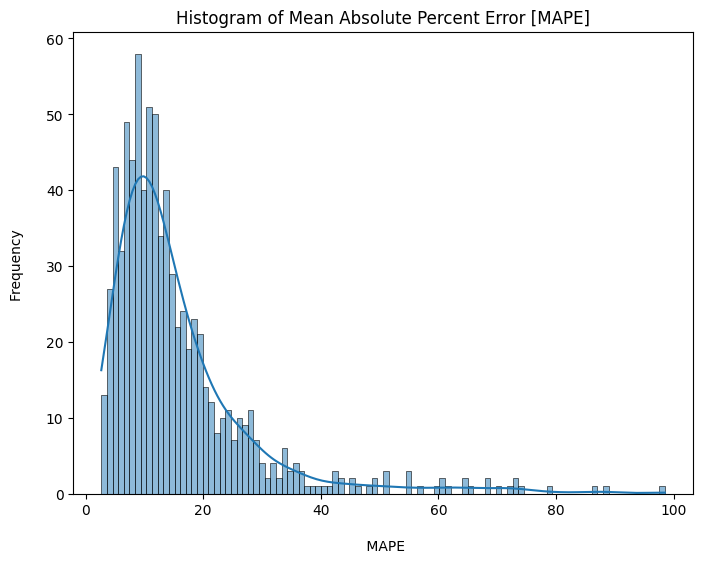

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of the "MAPE" variable
plt.figure(figsize=(8, 6))
sns.histplot(data=error_df[ (error_df['MAPE']<100) & (error_df['MAPE']>0) ], x="MAPE", bins=100, kde=True)

# Add labels and title
plt.xlabel("\n MAPE")
plt.ylabel("Frequency \n")
plt.title("Histogram of Mean Absolute Percent Error [MAPE]")

# Show the plot
plt.show()


In [74]:
# Ensure 'ds' columns are in datetime format
filtered_combined_city_df["ds"] = pd.to_datetime(filtered_combined_city_df["ds"])
city_currency_forecasts_From2021_to_Jan2025onwards["ds"] = pd.to_datetime(city_currency_forecasts_From2021_to_Jan2025onwards["ds"])

# Merge both tables on 'city_currency' and 'ds'
comparison = filtered_combined_city_df.merge(
    city_currency_forecasts_From2021_to_Jan2025onwards, 
    on=["city_currency", "ds"], 
    how="inner"
)

In [75]:
error_df

city_currency          MAE          RMSE       MAPE
0        788__USD     9.011026     11.181967  15.723002
1        788__CLP  5651.796724   7271.186728  13.545365
2       1024__CLP  8448.186795  13287.439825  13.782859
3      18966__BRL   136.689499    178.738456  16.122841
4      21523__BRL   302.095467   2176.178310  70.516221
..            ...          ...           ...        ...
813  8010727__USD    29.967334     39.339381  21.377432
814  8010742__USD    24.577896     31.605020  56.952260
815  8010759__MXN   428.561817    824.220829  12.552954
816  8010770__BRL    47.053318     65.537171   8.936421
817  8010776__BRL    53.257945     74.244521  14.905494

[787 rows x 4 columns]

In [76]:
city_currency_to_keep_error = error_df['city_currency'].drop_duplicates()

In [77]:
city_currency_to_keep_error

0          788__USD
1          788__CLP
2         1024__CLP
3        18966__BRL
4        21523__BRL
           ...     
813    8010727__USD
814    8010742__USD
815    8010759__MXN
816    8010770__BRL
817    8010776__BRL
Name: city_currency, Length: 787, dtype: object

In [78]:
comparison.shape

(725340, 24)

In [79]:
comparison = comparison[comparison['city_currency'].isin(city_currency_to_keep_error)]


In [80]:
city_currency_list = comparison.groupby('city_currency').size().sort_values(ascending=False).sample(50).index.tolist()

In [81]:
city_currency_list

['2856691__USD',
 '798885__BRL',
 '439877__BRL',
 '431722__BRL',
 '6051103__BRL',
 '3146178__BRL',
 '1528508__BRL',
 '3382157__BRL',
 '6747341__BRL',
 '692863__BRL',
 '1492404__BRL',
 '6544344__BRL',
 '2409687__BRL',
 '3978571__BRL',
 '208151__BRL',
 '1123449__BRL',
 '151597__BRL',
 '4554294__BRL',
 '4781871__EUR',
 '6978686__BRL',
 '561125__BRL',
 '1543325__BRL',
 '7692506__BRL',
 '6807651__BRL',
 '2551133__BRL',
 '1836098__BRL',
 '1155739__COP',
 '4371252__BRL',
 '3063678__BRL',
 '8009792__USD',
 '6965665__BRL',
 '7308145__BRL',
 '25788__BRL',
 '4971034__BRL',
 '2597914__BRL',
 '2171080__BRL',
 '6334931__BRL',
 '3990523__BRL',
 '1079741__BRL',
 '8009799__USD',
 '5701674__BRL',
 '2967981__BRL',
 '2160180__BRL',
 '21523__BRL',
 '5767881__BRL',
 '7879391__BRL',
 '8009871__USD',
 '5596667__BRL',
 '6566078__BRL',
 '2551314__BRL']

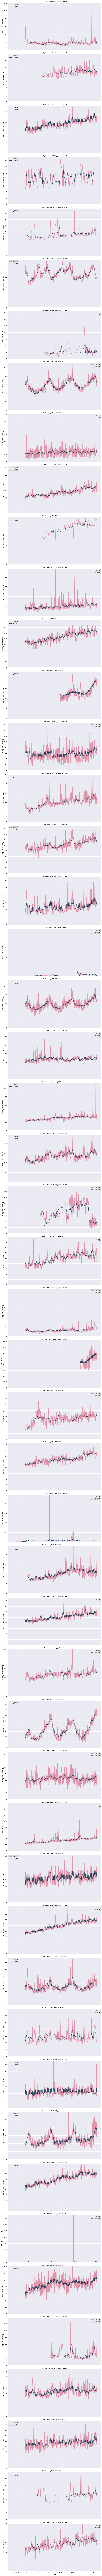

In [82]:

# Set the seaborn theme
sns.set_theme()

# Define figure size based on the number of hotels
fig, axes = plt.subplots(len(city_currency_list), 1, figsize=(12, 6 * len(city_currency_list)), sharex=True)

# If there's only one hotel, `axes` won't be an iterable, so wrap it in a list
if len(city_currency_list) == 1:
    axes = [axes]

# Define colors for historical and forecasted data
colors = {"historical": "#E195AB", "forecast": "#27445D"}

# Loop through each city_currency and create a separate plot
for i, city_currency in enumerate(city_currency_list):
    # Filter data for this city_currency
    city_currency_forecast = comparison[comparison["city_currency"] == city_currency]

    # Plot historical data
    sns.lineplot(ax=axes[i], 
                 data=city_currency_forecast, 
                 x="ds", y="y", label="Historical", color=colors["historical"])

    # Plot forecasted data
    sns.lineplot(ax=axes[i], 
                 data=city_currency_forecast, 
                 x="ds", y="yhat", label="Forecast", color=colors["forecast"], linestyle="dashed")

    # Formatting for each subplot
    axes[i].set_title(f"City|Currency {city_currency} Forecast")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Prices [Local Currency]")
    axes[i].legend()
    axes[i].grid(True)

     # Ensure the y-axis starts at zero
    axes[i].set_ylim(0, city_currency_forecast[["y", "yhat"]].max().max())


# Adjust layout to prevent overlap
plt.tight_layout()

# Show plots
plt.show()



In [84]:
city_currency_to_keep_error

0          788__USD
1          788__CLP
2         1024__CLP
3        18966__BRL
4        21523__BRL
           ...     
813    8010727__USD
814    8010742__USD
815    8010759__MXN
816    8010770__BRL
817    8010776__BRL
Name: city_currency, Length: 787, dtype: object

In [83]:
city_currency_forecasts_From2021_to_Jan2025onwards['city_currency'].nunique()

818

In [85]:

filtered_combined_city_df = filtered_combined_city_df[filtered_combined_city_df['city_currency'].isin(city_currency_to_keep_error)]

city_currency_forecasts_From2021_to_Jan2025onwards = city_currency_forecasts_From2021_to_Jan2025onwards[city_currency_forecasts_From2021_to_Jan2025onwards['city_currency'].isin(city_currency_to_keep_error)]



In [86]:
combined_df_hist = filtered_combined_city_df[filtered_combined_city_df['city_currency']=="4165866__BRL"]
all_citiy_currencies_forecasts_From2021_to_Jan2025onwards_future = city_currency_forecasts_From2021_to_Jan2025onwards[city_currency_forecasts_From2021_to_Jan2025onwards['city_currency']=="4165866__BRL"]

In [87]:
all_citiy_currencies_forecasts_From2021_to_Jan2025onwards_future

ds       trend  yhat_lower  yhat_upper  trend_lower  \
485479 2021-11-19  201.558230  136.731063  215.593393   201.558230   
485480 2021-11-20  201.650351  157.164692  231.001842   201.650351   
485481 2021-11-21  201.742471  143.516521  218.222650   201.742471   
485482 2021-11-22  201.834592  129.115655  204.569276   201.834592   
485483 2021-11-23  201.926712  132.657103  208.827795   201.926712   
...           ...         ...         ...         ...          ...   
487008 2026-01-26  292.933657  230.174326  309.180546   281.524575   
487009 2026-01-27  292.946801  232.304085  314.315324   281.478647   
487010 2026-01-28  292.959946  234.783325  316.033831   281.436555   
487011 2026-01-29  292.973090  238.901145  316.261243   281.387859   
487012 2026-01-30  292.986234  240.140108  322.494055   281.324433   

        trend_upper  additive_terms  additive_terms_lower  \
485479   201.558230      -26.543880            -26.543880   
485480   201.650351       -6.832092             -6.832092   
485481   201.742471      -19.832384            -19.832384   
485482   201.834592      -34.743077            -34.743077   
485483   201.926712      -33.338051            -33.338051   
...             ...             ...                   ...   
487008   304.931799      -23.437891            -23.437891   
487009   304.977579      -21.764037            -21.764037   
487010   305.024347      -17.916929            -17.916929   
487011   305.078439      -16.128916            -16.128916   
487012   305.131274      -13.526823            -13.526823   

        additive_terms_upper     weekly  ...  weekly_upper     yearly  \
485479            -26.543880  -0.493941  ...     -0.493941 -26.049939   
485480             -6.832092  18.999905  ...     18.999905 -25.831997   
485481            -19.832384   5.827235  ...      5.827235 -25.659620   
485482            -34.743077  -9.212165  ...     -9.212165 -25.530912   
485483            -33.338051  -7.895292  ...     -7.895292 -25.442759   
...                      ...        ...  ...           ...        ...   
487008            -23.437891  -9.212165  ...     -9.212165 -14.225726   
487009            -21.764037  -7.895292  ...     -7.895292 -13.868745   
487010            -17.916929  -4.367329  ...     -4.367329 -13.549599   
487011            -16.128916  -2.858414  ...     -2.858414 -13.270502   
487012            -13.526823  -0.493941  ...     -0.493941 -13.032882   

        yearly_lower  yearly_upper  multiplicative_terms  \
485479    -26.049939    -26.049939                   0.0   
485480    -25.831997    -25.831997                   0.0   
485481    -25.659620    -25.659620                   0.0   
485482    -25.530912    -25.530912                   0.0   
485483    -25.442759    -25.442759                   0.0   
...              ...           ...                   ...   
487008    -14.225726    -14.225726                   0.0   
487009    -13.868745    -13.868745                   0.0   
487010    -13.549599    -13.549599                   0.0   
487011    -13.270502    -13.270502                   0.0   
487012    -13.032882    -13.032882                   0.0   

        multiplicative_terms_lower  multiplicative_terms_upper        yhat  \
485479                         0.0                         0.0  175.014351   
485480                         0.0                         0.0  194.818259   
485481                         0.0                         0.0  181.910087   
485482                         0.0                         0.0  167.091515   
485483                         0.0                         0.0  168.588661   
...                            ...                         ...         ...   
487008                         0.0                         0.0  269.495766   
487009                         0.0                         0.0  271.182764   
487010                         0.0                         0.0  275.043017   
487011                         0.0                         0.0 

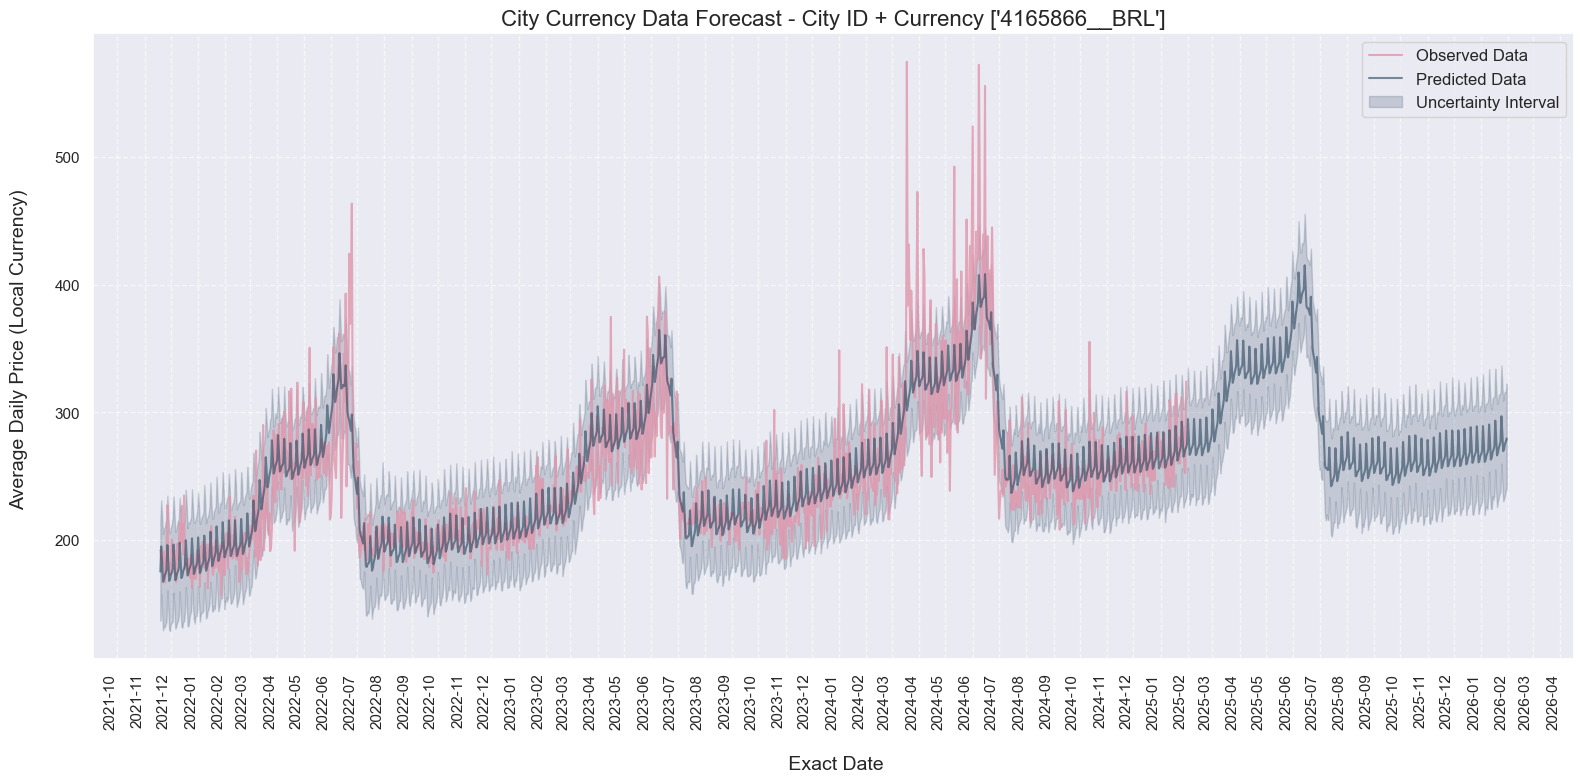

In [88]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Set the seaborn theme
sns.set_theme()

# Plot observed data and predictions with different colors
plt.figure(figsize=(16, 8))
plt.plot(combined_df_hist['ds'], combined_df_hist['y'], label="Observed Data", color="#E195AB", alpha=0.8)
plt.plot(all_citiy_currencies_forecasts_From2021_to_Jan2025onwards_future['ds'], all_citiy_currencies_forecasts_From2021_to_Jan2025onwards_future['yhat'], label="Predicted Data", color="#27445D", alpha=0.6)

# Add confidence intervals for predictions
plt.fill_between(
    all_citiy_currencies_forecasts_From2021_to_Jan2025onwards_future['ds'], all_citiy_currencies_forecasts_From2021_to_Jan2025onwards_future['yhat_lower'], all_citiy_currencies_forecasts_From2021_to_Jan2025onwards_future['yhat_upper'], color="#27445D", alpha=0.2, label="Uncertainty Interval"
)

# Customize x-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set ticks every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Month
plt.gcf().autofmt_xdate(rotation=90)  # Rotate x-axis labels vertically

# Customize the plot
plt.title(f"City Currency Data Forecast - City ID + Currency {combined_df_hist['city_currency'].unique()}", fontsize=16)
plt.xlabel("\n Exact Date", fontsize=14)
plt.ylabel("Average Daily Price (Local Currency) \n", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)


# Save the plot before showing
plt.savefig(f"../out/figures/city_currency_forecast_{combined_df_hist['city_currency'].unique()}.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.tight_layout()
plt.show()


In [89]:

filtered_combined_city_df.to_csv("../out/all_city_currency_historic_From2021_to_Jan2025_final_selected_final_selected.csv", index=False)
city_currency_forecasts_From2021_to_Jan2025onwards.to_csv("../out/city_currency_forecasts_From2021_to_Jan2025onwards_final_selected.csv", index=False)



In [90]:
# Set the seaborn theme
sns.set_theme()

# Get unique city_currency IDs
city_currency_to_keep_error

# Loop through each city_currency_ids
for city_currency in city_currency_to_keep_error:
    # Filter data for the current city_currency_ids
    city_currency_hist = filtered_combined_city_df[filtered_combined_city_df["city_currency"] == city_currency]
    city_currency_forecast = city_currency_forecasts_From2021_to_Jan2025onwards[
        city_currency_forecasts_From2021_to_Jan2025onwards["city_currency"] == city_currency
    ]

    # Create a new figure
    plt.figure(figsize=(16, 8))
    
    # Plot observed data
    plt.plot(city_currency_hist["ds"], city_currency_hist["y"], label="Observed Data", color="#E195AB", alpha=0.8)
    
    # Plot predicted data
    plt.plot(city_currency_forecast["ds"], city_currency_forecast["yhat"], label="Predicted Data", color="#27445D", alpha=0.6)
    
    # Add confidence intervals for predictions
    plt.fill_between(
        city_currency_forecast["ds"], 
        city_currency_forecast["yhat_lower"], 
        city_currency_forecast["yhat_upper"], 
        color="#27445D", alpha=0.2, label="Uncertainty Interval"
    )

    # Customize x-axis
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  
    plt.gcf().autofmt_xdate(rotation=90)  

    # Customize the plot
    plt.title(f"City Currency Data Forecast - City ID + Currency {city_currency}", fontsize=16)
    plt.xlabel("\n Exact Date", fontsize=14)
    plt.ylabel("Average Daily Price (Local Currency) \n", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)

    # Save the plot with hotel_id in the filename
    plt.savefig(f"../out/figures/png/city_currency_forecast_{city_currency}.png", dpi=300, bbox_inches="tight")
    
    # Close the plot to free memory before the next iteration
    plt.close()

print("All plots saved successfully!")

All plots saved successfully!


In [91]:
# Set the seaborn theme
sns.set_theme()

# Get unique city_currency IDs
city_currency_to_keep_error

# Create a single PDF to store all plots
with PdfPages("../out/figures/pdf/city_currency_forecasts_prophet_365_2025_v2.pdf") as pdf:
    for city_currency in city_currency_to_keep_error:
        # Filter data for the current hotel
        city_currency_hist = filtered_combined_city_df[filtered_combined_city_df["city_currency"] == city_currency]
        city_currency_forecast = city_currency_forecasts_From2021_to_Jan2025onwards[
            city_currency_forecasts_From2021_to_Jan2025onwards["city_currency"] == city_currency
        ]

        # Create a new figure
        plt.figure(figsize=(16, 8))

        # Plot observed data
        plt.plot(city_currency_hist["ds"], city_currency_hist["y"], label="Observed Data", color="#E195AB", alpha=0.8)

        # Plot predicted data
        plt.plot(city_currency_forecast["ds"], city_currency_forecast["yhat"], label="Predicted Data", color="#27445D", alpha=0.6)

        # Add confidence intervals for predictions
        plt.fill_between(
            city_currency_forecast["ds"], 
            city_currency_forecast["yhat_lower"], 
            city_currency_forecast["yhat_upper"], 
            color="#27445D", alpha=0.2, label="Uncertainty Interval"
        )

        # Customize x-axis
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  
        plt.gcf().autofmt_xdate(rotation=90)  

        # Customize the plot
        plt.title(f"City Data Forecast - City ID + Currency {city_currency}", fontsize=16)
        plt.xlabel("\n Exact Date", fontsize=14)
        plt.ylabel("Average Daily Price (Local Currency) \n", fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, linestyle="--", alpha=0.6)

        # Save the current figure to the PDF
        pdf.savefig()
        plt.close()  # Close the figure to free memory

print("All plots saved successfully in 'city_currency_forecasts.pdf'!")

All plots saved successfully in 'city_currency_forecasts.pdf'!


In [92]:
import plotly.graph_objects as go
import pandas as pd

# Get unique hotel IDs
city_currency_to_keep_error
output_dir = "../out/figures/html/"


for city_currency in city_currency_to_keep_error:
    # Extract data for the current hotel
    city_currency_hist = filtered_combined_city_df[filtered_combined_city_df["city_currency"] == city_currency]
    city_currency_forecast = city_currency_forecasts_From2021_to_Jan2025onwards[
        city_currency_forecasts_From2021_to_Jan2025onwards["city_currency"] == city_currency
    ]

    # Create interactive plot
    fig = go.Figure()

    # Add observed data
    fig.add_trace(go.Scatter(
        x=city_currency_hist["ds"],
        y=city_currency_hist["y"],
        mode="lines",
        name="Observed Data",
        line=dict(color="#E195AB")
    ))

    # Add predicted data
    fig.add_trace(go.Scatter(
        x=city_currency_forecast["ds"],
        y=city_currency_forecast["yhat"],
        mode="lines",
        name="Predicted Data",
        line=dict(color="#27445D", dash="dash")
    ))

    # Add confidence interval
    fig.add_trace(go.Scatter(
        x=city_currency_forecast["ds"].tolist() + city_currency_forecast["ds"].tolist()[::-1],
        y=city_currency_forecast["yhat_upper"].tolist() + city_currency_forecast["yhat_lower"].tolist()[::-1],
        fill="toself",
        fillcolor="rgba(39,68,93,0.3)",
        line=dict(color="rgba(255,255,255,0)"),
        name="Uncertainty Interval"
    ))

    # Customize layout
    fig.update_layout(
        title=f"City Data Forecast - City ID + Currency {city_currency}",
        xaxis_title="Exact Date",
        yaxis_title="Average Daily Price (Local Currency)",
        xaxis=dict(tickformat="%Y-%m", tickangle=90),
        template="plotly_white"
    )

    # Save as HTML file
    output_path = os.path.join(output_dir, f"city_currency_forecast_{city_currency}.html")
    fig.write_html(output_path)

print("All interactive plots saved successfully!")


All interactive plots saved successfully!
